In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time
import statistics

## Variable Global

In [2]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [3]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("./tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [4]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [5]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [6]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [7]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [8]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [9]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1
    
    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [10]:
# Genera solucion aleatoria
def solucionAleatoria(tam, num):
    vResult = list(range(0,tam))
    random.seed(num)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [11]:
# Genera solucion aleatoria
def solucionAleatoria2(tam):
    vResult = list(range(0,tam))
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [12]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [13]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [14]:
def representaResultados(analisisResultado, nombre):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
    
    #tablaFinal.to_excel(nombre + ".xlsx")  
    
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])
    

In [15]:
def representaResultados2(analisisResultado, nombre):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste Maximo","Coste Medio", "Coste Mínimo", "Tiempo"])
    for i in range(0,5):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3],analisisResultado[i][4]]
    
    tablaFinal.to_excel(nombre + ".xlsx")  
    
    display(tablaFinal)

# Fichero a Analizar

In [16]:
#x, y = leeArchivo("st70.tsp")
x, y = leeArchivo("ch130.tsp")
#x, y = leeArchivo("a280.tsp")
#x, y = leeArchivo("vm1748.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy Estandar

In [17]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.007977962493896484


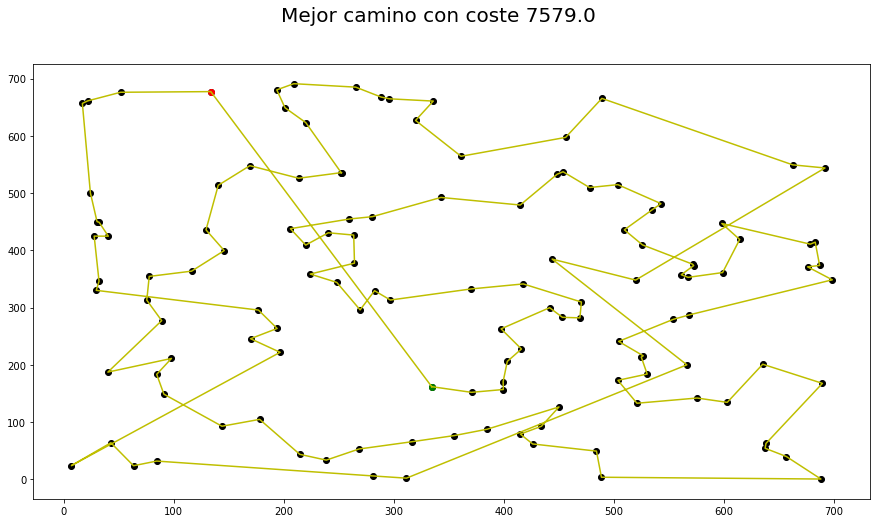

In [18]:
# Greedy
resultado, km = greedy(x, y,"s")

# Busqueda Local El Mejor

In [43]:
# Algoritmo Busqueda Local Basico
def busquedaLocalBasico(x, y, w, costeActual):
    mejorV = []
    encontrado = False
    maximo = 1600 * len(x)
    i = 0
    while encontrado == False:
        mejorV, mejorCost, i = mejorVecino(w, i, maximo)
        if mejorCost < costeActual:
            w = mejorV.copy()
            costeActual = mejorCost
        elif i > maximo or mejorCost >= costeActual:
            encontrado = True
    return w, costeActual, i

In [44]:
# Devuelve el mejor vecino
def mejorVecino(w, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste.copy()
    for i in range(0, len(w)):
        for j in range(i + 1,len(w)):
            w2 = w.copy();
            w2[i], w2[j] = w2[j], w2[i]
            coste = calculaCosteVecino(costeSolAntigua, w, w2, i, j)
            if coste < mejorCoste :
                mejor = w2
                mejorCoste = coste
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
    return mejor, mejorCoste, sumador

In [45]:
# Algoritmo Busqueda Local El Mejor
def busquedaLocalElMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = mejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado, "BL-ElMejor")
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,23938.0,208000.0,1.011448
1,1.0,22697.0,208000.0,0.972408
2,2.0,23819.0,208000.0,0.857214
3,3.0,24761.0,208000.0,0.883377
4,4.0,23218.0,208000.0,0.849026
5,5.0,23262.0,208000.0,0.843720
6,6.0,23738.0,208000.0,0.837435
7,7.0,23022.0,208000.0,0.843524
8,8.0,23752.0,208000.0,0.914940
9,9.0,23460.0,208000.0,0.944074


Media coste:  23566.7
Desviación típica coste:  574.4994052796458
Media numero de evaluaciones:  208000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  0.8957164049148559


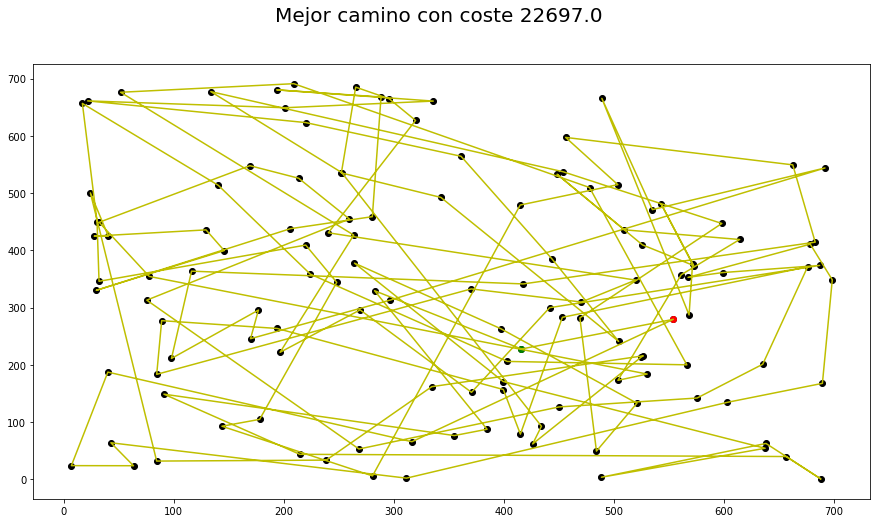

In [47]:
# Busqueda Local El Mejor
busquedaLocalElMejor(x, y)

# Algoritmos Genéticos

## Algoritmo Genético Básico

In [20]:
def seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla):
    minimo = float("inf")
    pad = 0
    for selecc in range(0, tamTorneo):
        cand = random.randint(0,tamPobla - 1)
        coste = costePobla[cand]
        if coste < minimo:
            minimo = coste
            pad = cand
    return poblacion[pad]

In [21]:
def mutaSolucion(wBest, s):
    n = len(wBest)

    pivote1 = random.randint(0,n - 1)
    pivote2 = pivote1 + s

    if pivote2 > (n - 1):
        pivote2 = n - 1

    sublista = wBest[pivote1:pivote2]

    tam = len(sublista)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        sublista[i], sublista[rnd] = sublista[rnd], sublista[i]

    wBest[pivote1:pivote2] = sublista
    return wBest

In [22]:
def cruce(padre1, padre2, porTSublista):
    
    n = len(padre1)
    
    tSublista = round(n * porTSublista)
    
    pivote1 = random.randint(0,n - 2)
    pivote2 = pivote1 + tSublista + 1
        
    if pivote2 > n:
        pivote2 = n
    
    sublista = padre1[pivote1:pivote2]
       
    descendiente = list(range(0,n))
    descendiente[pivote1:pivote2] = sublista
    
    for i in range(0,n):
        if i < pivote1 or i >= pivote2:
            for k in range(0,len(padre2)):
                ciu = padre2[k]
                if ciu not in sublista:
                    descendiente[i] = ciu
                    padre2.remove(ciu)
                    break

    return descendiente

In [23]:
def geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, porTSublista, greed, vueltasBucle):
    analisisResultado = []
    for sem in range(0,5):
        resultadoIntermedio = []
        tic()
        semilla = ( sem + 1 ) * 50
        random.seed(semilla)
        media = []
        mejor = []

        # Creación de población inicial
        poblacion = []
        costePobla = []

        if greed == "s":
            for i in range(0, tamPobla - 1):
                solucion = solucionAleatoria2(tam)
                poblacion.append(solucion)
                costePobla.append(calculaCoste(solucion))

            # Siembro una solución greedy
            resGreedy, coste = greedy(x, y,"n")
            poblacion.append(resGreedy)
            costePobla.append(coste)
            
        else:
            for i in range(0, tamPobla):
                solucion = solucionAleatoria2(tam)
                poblacion.append(solucion)
                costePobla.append(calculaCoste(solucion))

        media.append(statistics.mean(costePobla))
        mejor.append(min(costePobla))

        encontrado = False
        cruces = 0
        numIteraciones = vueltasBucle * 2 / tamPobla
        limBuclue = ((tamPobla/2) - 0.1 * tamPobla) 

        while encontrado == False:

            nuevaPoblacion = []
            nuevoCostePoblacion = []

            iterador = 0

            while iterador <= limBuclue:

                padre1 = seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla)
                padre2 = seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla)

                descendiente1 = cruce(padre1.copy(), padre2.copy(), porTSublista)
                descendiente2 = cruce(padre2.copy(), padre1.copy(), porTSublista)

                dado1 = random.random()
                dado2 = random.random()

                if dado1 <= probabilidadMutacion:
                    descendiente1 = mutaSolucion(descendiente1, tamMutacion)

                if dado2 <= probabilidadMutacion:
                    descendiente2 = mutaSolucion(descendiente2, tamMutacion)

                costeDescendiente1 = calculaCoste(descendiente1)
                costeDescendiente2 = calculaCoste(descendiente2)

                nuevaPoblacion.append(descendiente1)
                nuevaPoblacion.append(descendiente2)

                nuevoCostePoblacion.append(costeDescendiente1)
                nuevoCostePoblacion.append(costeDescendiente2)                                             

                iterador += 1
            
            aux = costePobla.copy()
            aux.sort()
            aux = np.array(aux)

            it = 0        
            while len(nuevoCostePoblacion) < tamPobla:
                minimo = np.where(costePobla == aux[it])
                maxlen = len(minimo[0])
                z = 0
                while z < maxlen and len(nuevoCostePoblacion) < tamPobla:
                    nuevaPoblacion.append(poblacion[int(minimo[0][z])])
                    nuevoCostePoblacion.append(aux[it])
                    it += 1
                    z += 1

            cruces += 1

            poblacion = nuevaPoblacion.copy()
            costePobla = nuevoCostePoblacion.copy()

            media.append(statistics.mean(costePobla))
            mejor.append(min(costePobla))

            if cruces >= numIteraciones:
                encontrado = True
            
        t = toc()
        resultadoIntermedio.append(semilla)
        resultadoIntermedio.append(max(costePobla))
        resultadoIntermedio.append(statistics.mean(costePobla))
        resultadoIntermedio.append(min(costePobla))
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)   
        
        plt.figure(figsize=(8, 4))
        plt.plot(mejor)
        plt.plot(media)
        plt.show()
        
    representaResultados2(analisisResultado, "AG-Basico")

### Estudio Tamaño Poblacion

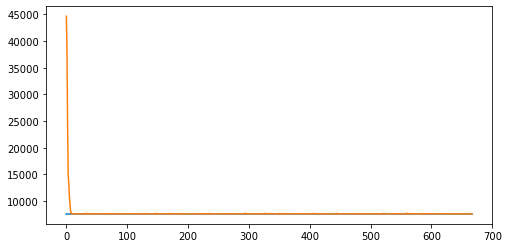

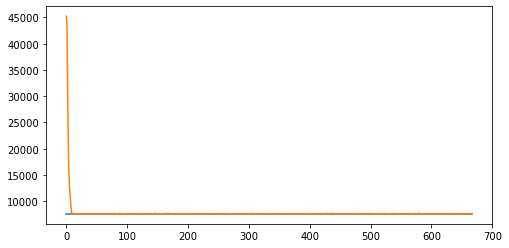

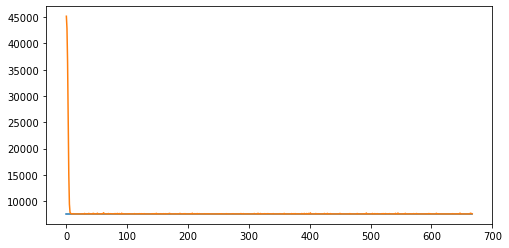

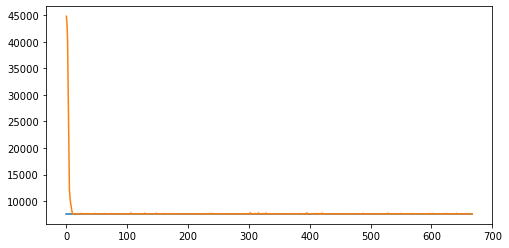

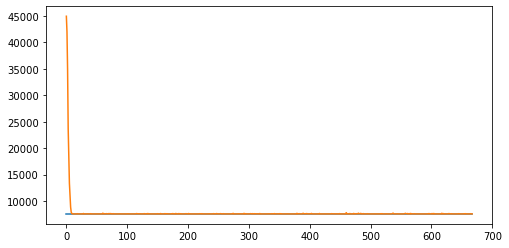

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,7579.0,7579.0,7579.0,16.705593
1,100.0,8670.0,7648.7,7579.0,16.811239
2,150.0,7579.0,7579.0,7579.0,16.694290
3,200.0,7579.0,7579.0,7579.0,16.294122
4,250.0,7579.0,7579.0,7579.0,16.689479


In [52]:
tamPobla = 30
tam = len(x)
tamTorneo = round(tamPobla * 0.1)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "s"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

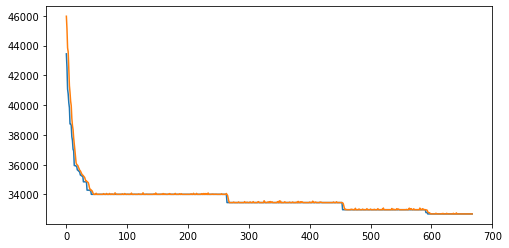

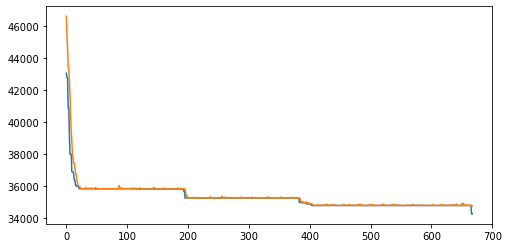

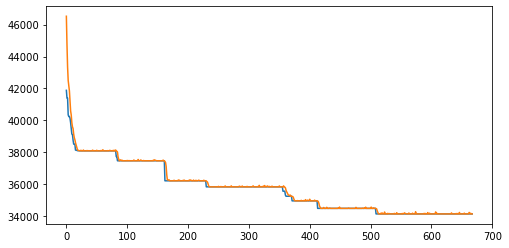

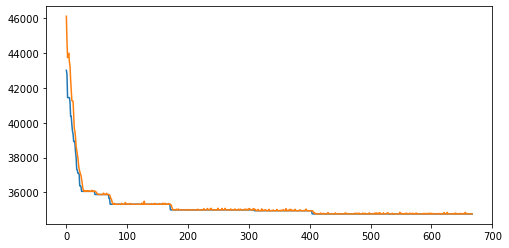

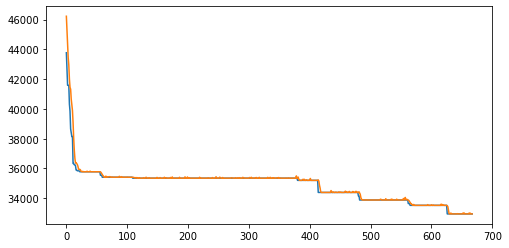

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,32696.0,32696.000000,32696.0,12.977928
1,100.0,34819.0,34741.133333,34285.0,12.900194
2,150.0,34130.0,34130.000000,34130.0,13.203277
3,200.0,34754.0,34754.000000,34754.0,12.739323
4,250.0,32950.0,32950.000000,32950.0,12.944601


In [53]:
tamPobla = 30
tam = len(x)
tamTorneo = round(tamPobla * 0.1)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

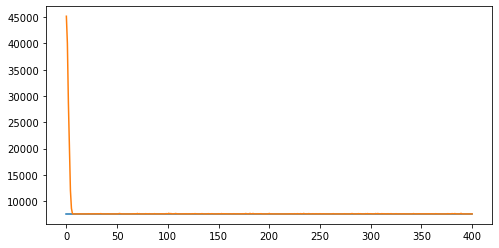

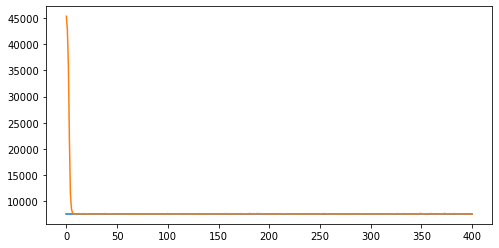

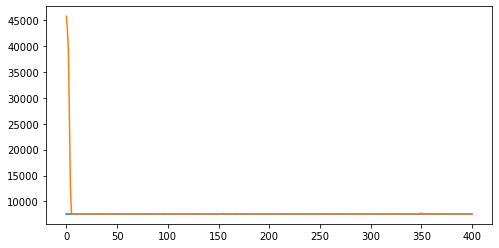

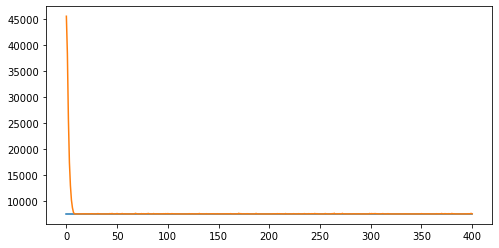

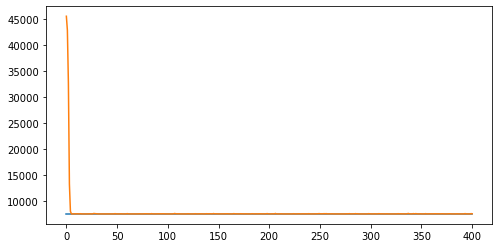

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,7579.0,7579.00,7579.0,16.131250
1,100.0,7579.0,7579.00,7579.0,16.178146
2,150.0,8325.0,7593.92,7579.0,16.291991
3,200.0,7579.0,7579.00,7579.0,15.993090
4,250.0,8487.0,7597.16,7579.0,15.669083


In [54]:
tamPobla = 50
tam = len(x)
tamTorneo = round(tamPobla * 0.1)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "s"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

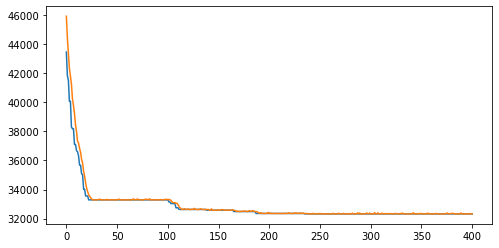

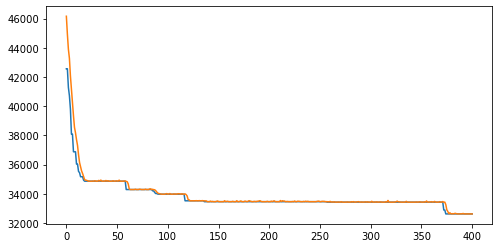

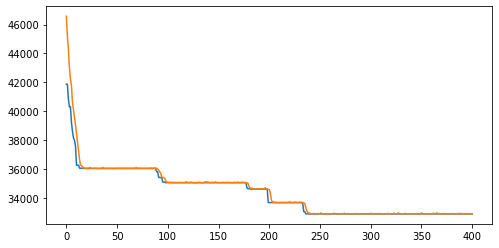

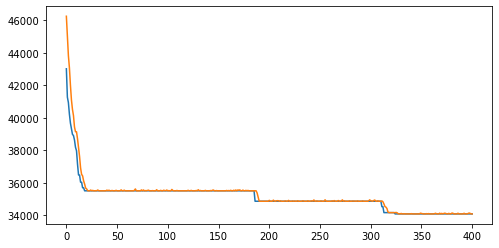

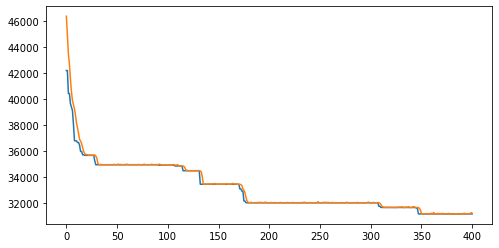

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,32323.0,32323.00,32323.0,12.787174
1,100.0,32626.0,32626.00,32626.0,12.398709
2,150.0,32919.0,32919.00,32919.0,12.275814
3,200.0,34077.0,34077.00,34077.0,12.271464
4,250.0,33803.0,31236.38,31184.0,12.887594


In [55]:
tamPobla = 50
tam = len(x)
tamTorneo = round(tamPobla * 0.1)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

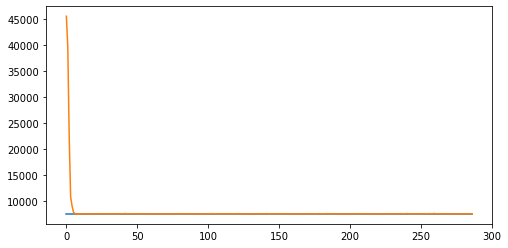

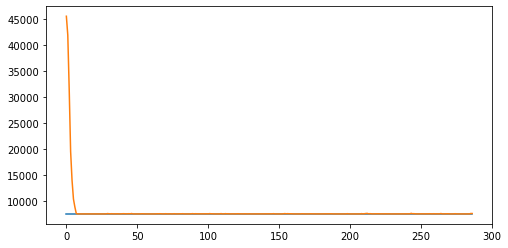

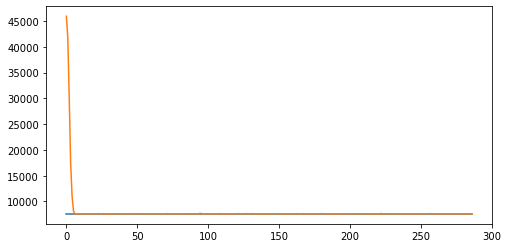

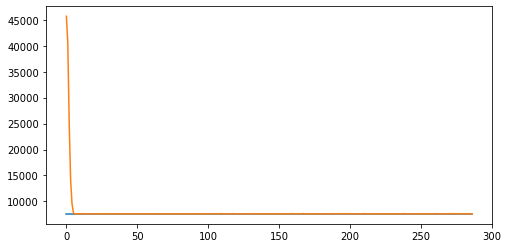

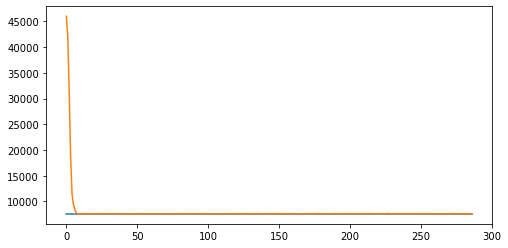

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,7579.0,7579.000000,7579.0,15.811445
1,100.0,11934.0,7653.357143,7579.0,16.766905
2,150.0,7579.0,7579.000000,7579.0,15.105561
3,200.0,7579.0,7579.000000,7579.0,15.611440
4,250.0,8726.0,7595.385714,7579.0,15.757920


In [56]:
tamPobla = 70
tam = len(x)
tamTorneo = round(tamPobla * 0.1)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "s"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

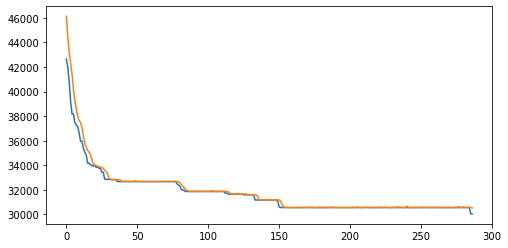

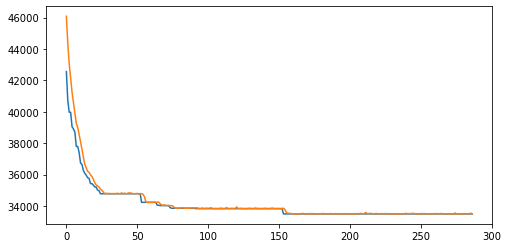

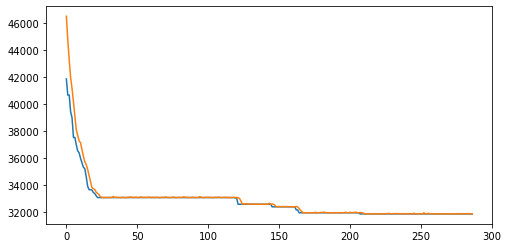

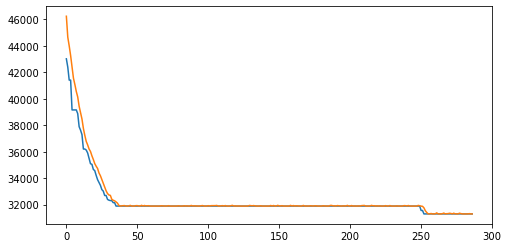

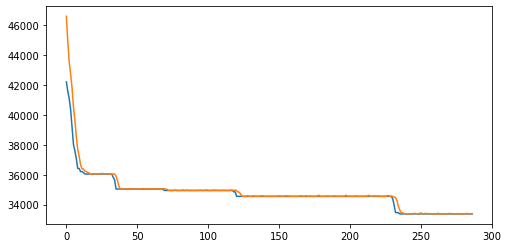

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,31743.0,30524.214286,30042.0,12.092422
1,100.0,33491.0,33491.000000,33491.0,12.892569
2,150.0,31891.0,31891.000000,31891.0,12.339996
3,200.0,31297.0,31297.000000,31297.0,12.135738
4,250.0,34628.0,33393.885714,33376.0,12.348715


In [57]:
tamPobla = 70
tam = len(x)
tamTorneo = round(tamPobla * 0.1)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

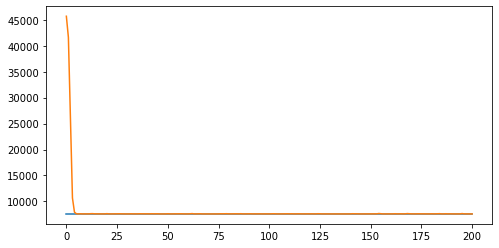

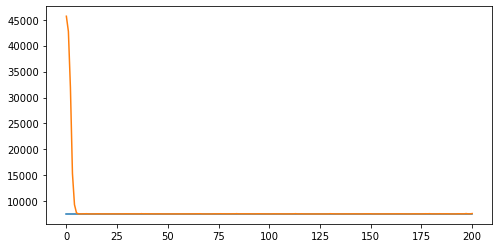

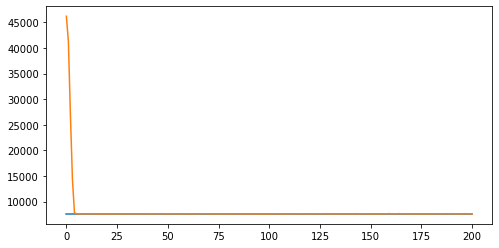

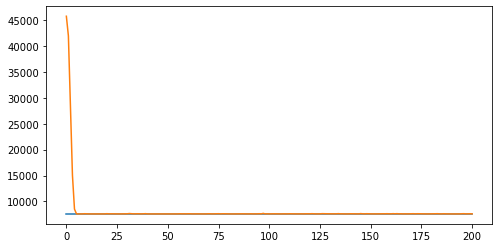

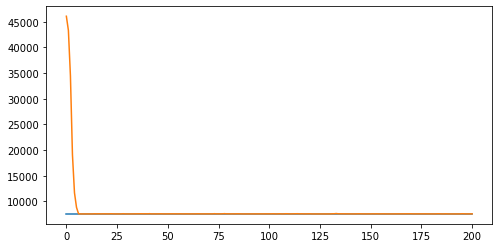

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,7579.0,7579.00,7579.0,15.221209
1,100.0,12128.0,7645.07,7579.0,15.325670
2,150.0,8851.0,7591.72,7579.0,15.910996
3,200.0,8164.0,7584.85,7579.0,15.565751
4,250.0,8676.0,7589.97,7579.0,15.224329


In [58]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.1)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "s"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

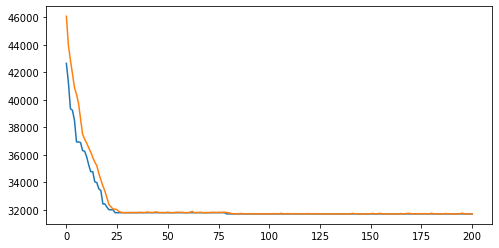

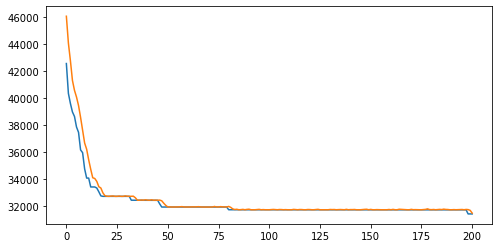

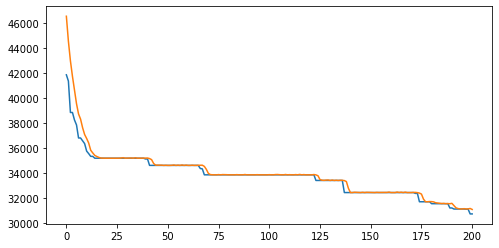

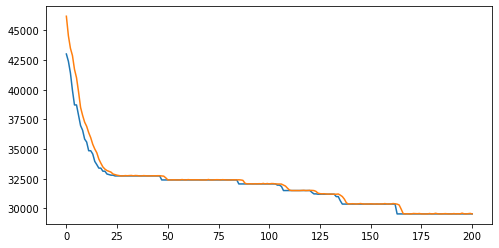

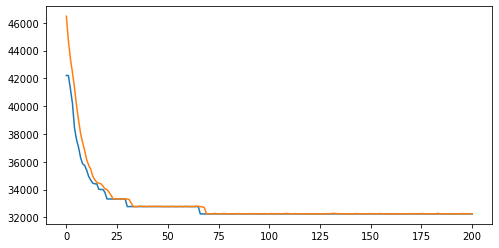

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,31705.0,31705.00,31705.0,12.549156
1,100.0,32923.0,31484.24,31424.0,11.859429
2,150.0,31110.0,31091.20,30734.0,11.762595
3,200.0,29538.0,29538.00,29538.0,12.215357
4,250.0,33676.0,32270.20,32256.0,12.695313


In [59]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.1)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

### Estudio Valor k Torneo

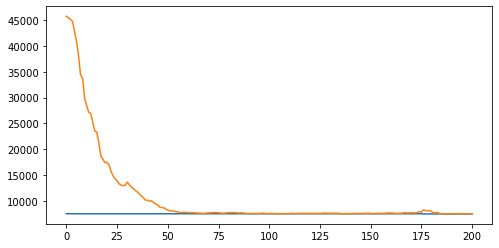

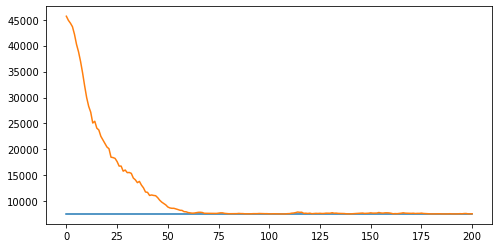

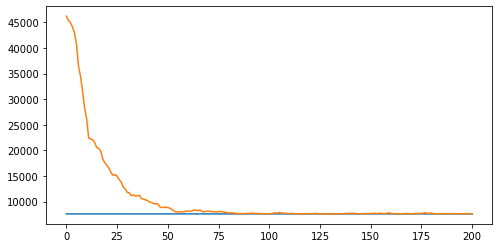

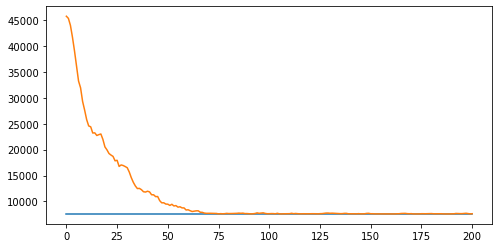

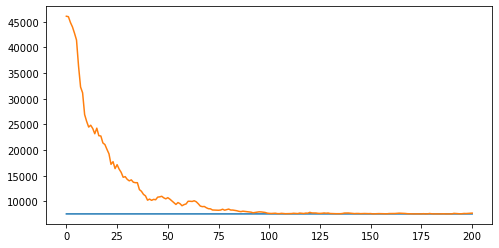

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,9378.0,7564.32,7546.0,20.529199
1,100.0,8661.0,7600.64,7579.0,22.334936
2,150.0,8549.0,7584.74,7575.0,20.000551
3,200.0,9914.0,7615.86,7579.0,20.267312
4,250.0,10123.0,7731.12,7577.0,20.358794


In [60]:
tamPobla = 100
tam = len(x)
tamTorneo = 1
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "s"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

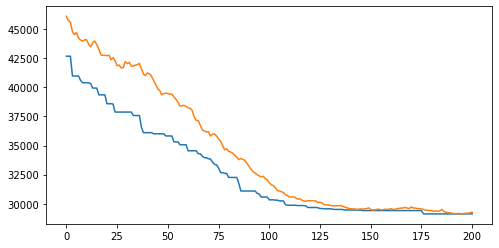

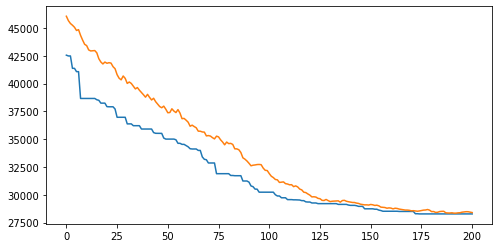

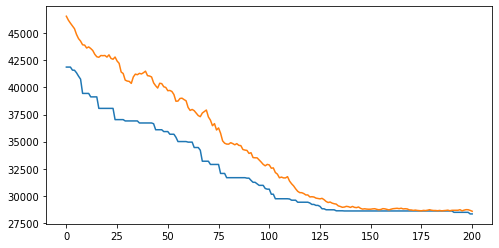

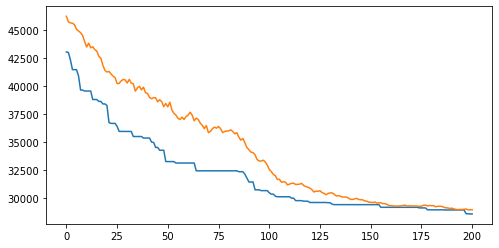

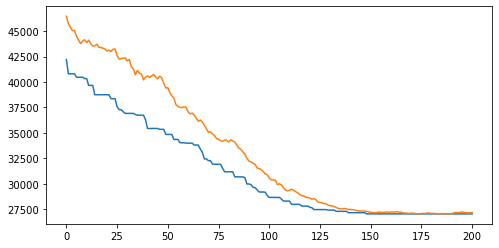

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,31231.0,29275.43,29133.0,12.790017
1,100.0,29853.0,28398.32,28276.0,12.147511
2,150.0,30527.0,28568.09,28324.0,12.664611
3,200.0,30354.0,28953.86,28577.0,12.323489
4,250.0,29448.0,27154.62,27027.0,11.912864


In [61]:
tamPobla = 100
tam = len(x)
tamTorneo = 1
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

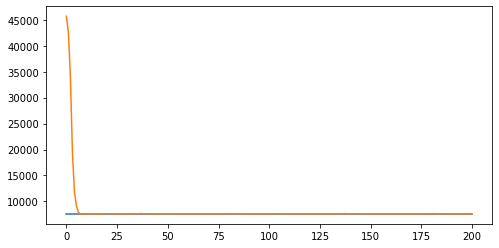

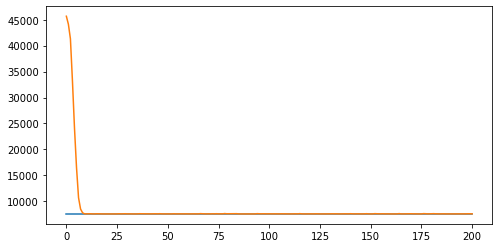

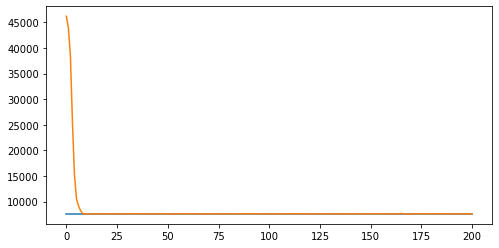

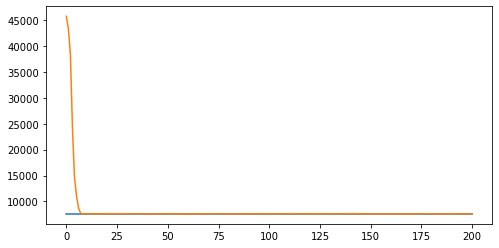

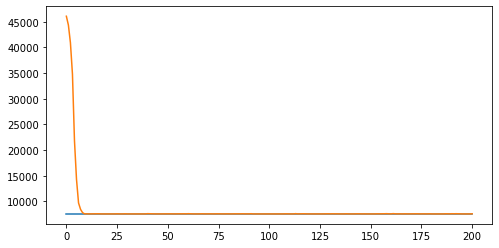

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,7579.0,7579.00,7579.0,16.185210
1,100.0,8825.0,7591.46,7579.0,15.225466
2,150.0,9499.0,7598.20,7579.0,16.962463
3,200.0,7579.0,7579.00,7579.0,14.974024
4,250.0,10125.0,7604.46,7579.0,15.249894


In [68]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "s"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

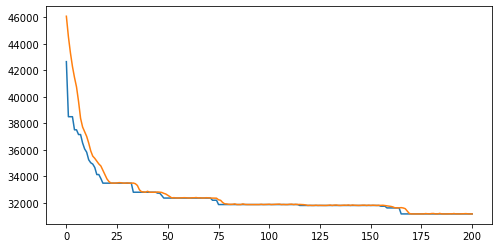

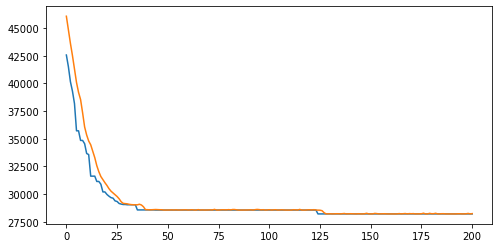

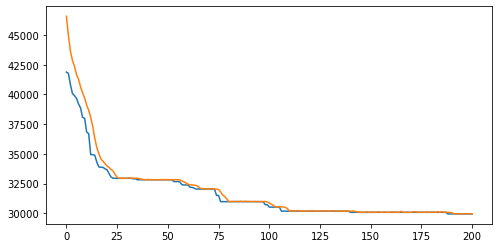

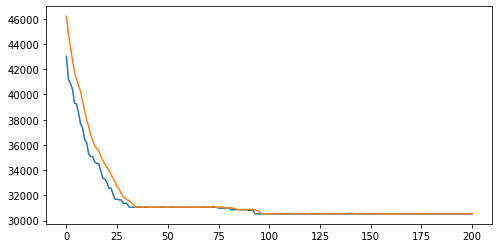

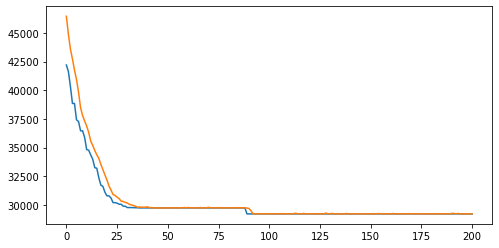

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,31157.0,31157.00,31157.0,12.511741
1,100.0,30793.0,28233.85,28208.0,11.908720
2,150.0,30747.0,29959.95,29952.0,11.947995
3,200.0,31456.0,30543.22,30534.0,11.728601
4,250.0,30821.0,29221.16,29205.0,12.383489


In [69]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

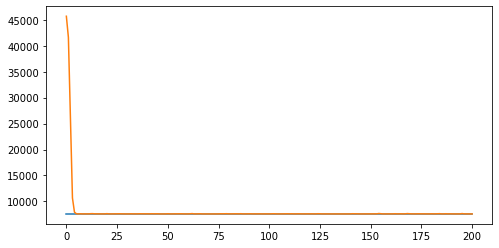

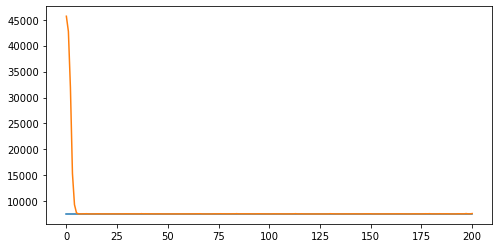

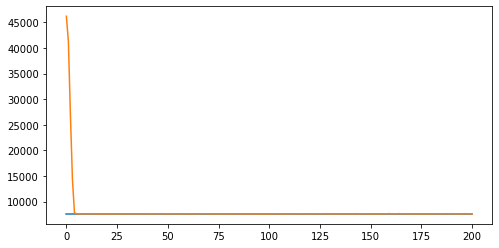

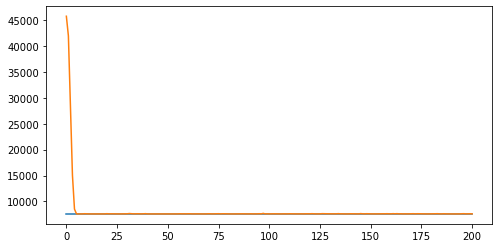

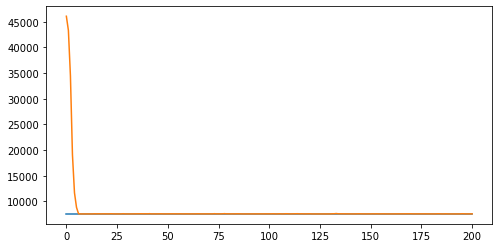

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,7579.0,7579.00,7579.0,16.121438
1,100.0,12128.0,7645.07,7579.0,15.185273
2,150.0,8851.0,7591.72,7579.0,16.435453
3,200.0,8164.0,7584.85,7579.0,15.779211
4,250.0,8676.0,7589.97,7579.0,15.905335


In [62]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.1)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "s"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

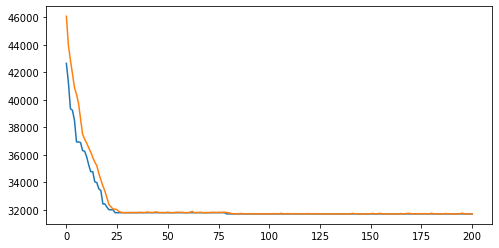

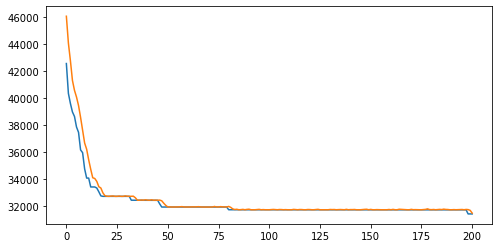

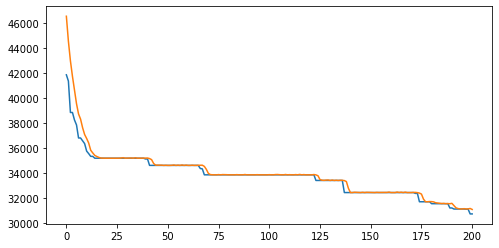

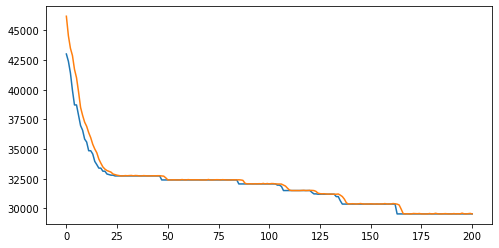

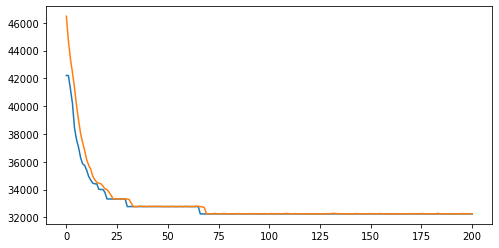

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,31705.0,31705.00,31705.0,12.353998
1,100.0,32923.0,31484.24,31424.0,12.651867
2,150.0,31110.0,31091.20,30734.0,11.913432
3,200.0,29538.0,29538.00,29538.0,12.160010
4,250.0,33676.0,32270.20,32256.0,11.898857


In [63]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.1)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

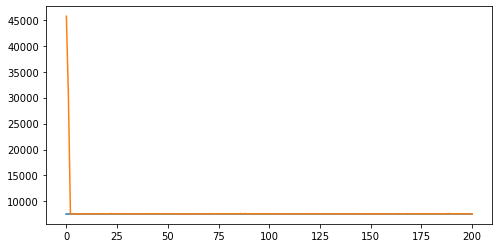

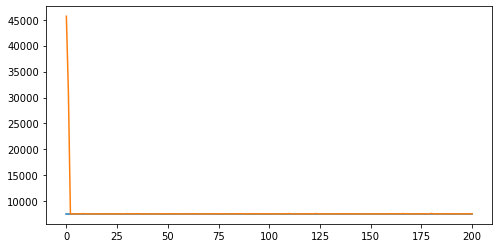

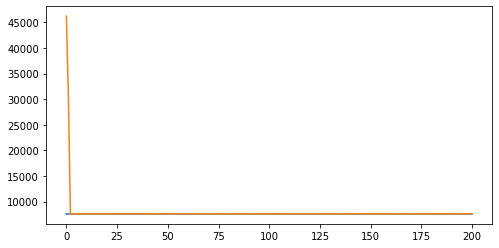

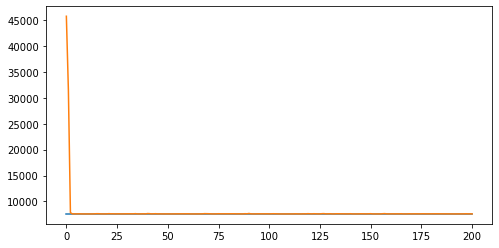

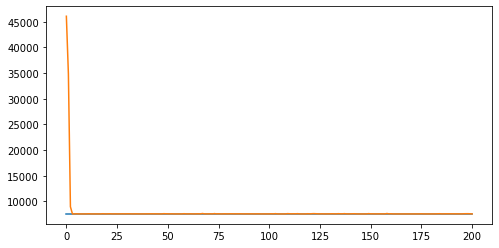

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,7579.0,7579.00,7579.0,16.775209
1,100.0,8981.0,7601.97,7579.0,15.486923
2,150.0,7579.0,7579.00,7579.0,16.971361
3,200.0,7579.0,7579.00,7579.0,17.010404
4,250.0,7579.0,7579.00,7579.0,16.534650


In [64]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.5)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "s"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

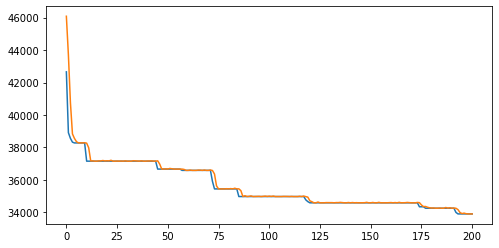

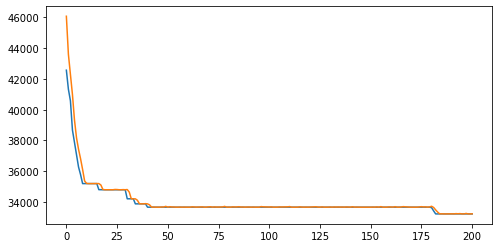

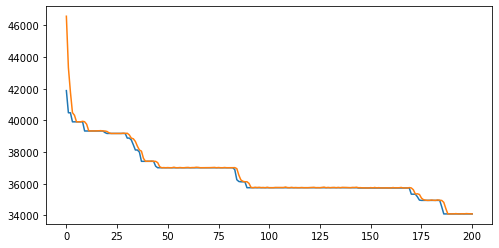

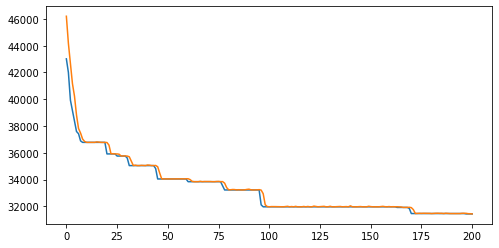

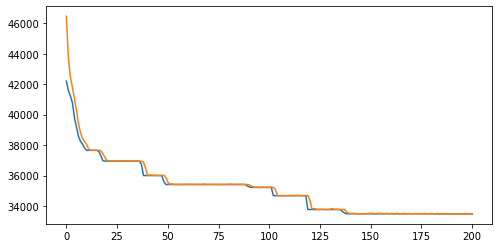

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,33900.0,33900.00,33900.0,12.842450
1,100.0,33651.0,33238.23,33231.0,13.022439
2,150.0,34099.0,34099.00,34099.0,12.350308
3,200.0,31434.0,31434.00,31434.0,12.356121
4,250.0,33480.0,33480.00,33480.0,12.182702


In [65]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.5)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

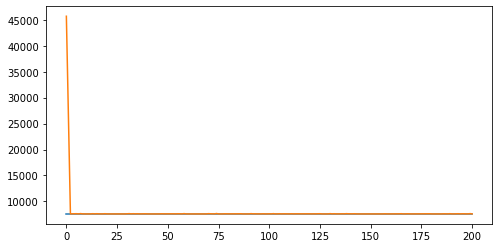

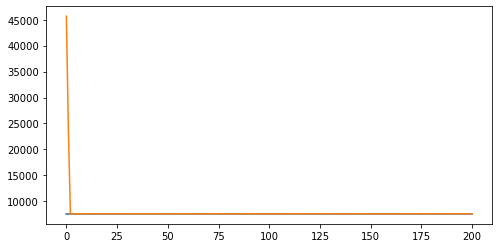

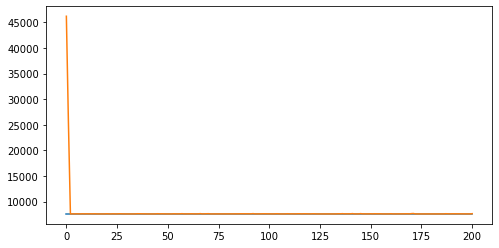

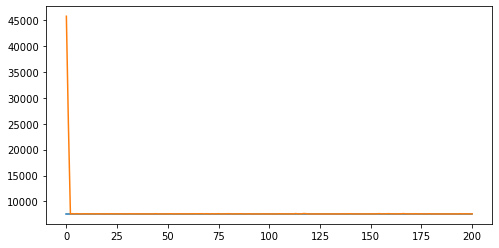

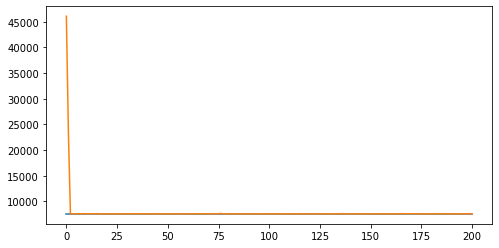

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,7579.0,7579.00,7579.0,17.073107
1,100.0,9426.0,7605.78,7579.0,16.487702
2,150.0,10278.0,7625.09,7579.0,16.361388
3,200.0,8678.0,7589.99,7579.0,16.531013
4,250.0,7579.0,7579.00,7579.0,16.473070


In [66]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "s"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

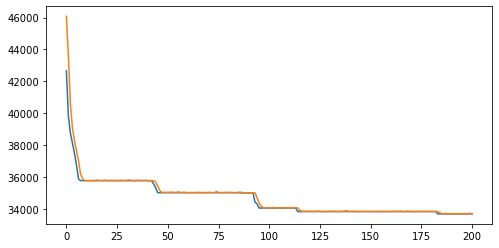

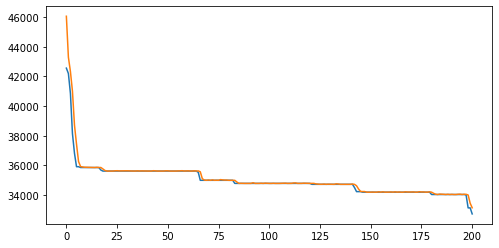

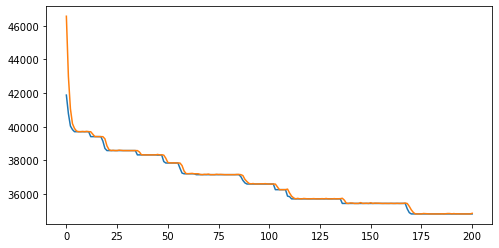

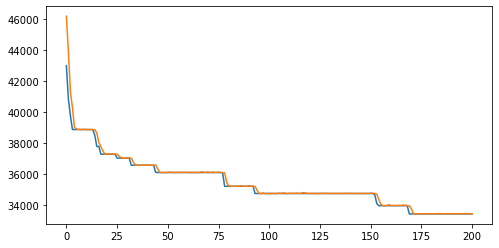

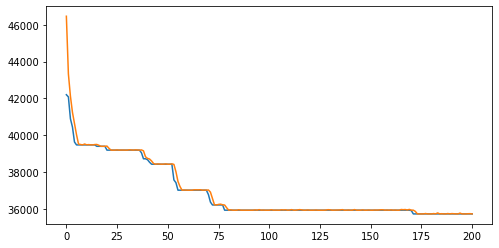

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,33679.0,33679.00,33679.0,13.169516
1,100.0,34034.0,33132.98,32720.0,13.125055
2,150.0,36460.0,34843.14,34808.0,13.468148
3,200.0,34743.0,33465.90,33453.0,12.656771
4,250.0,35730.0,35730.00,35730.0,12.621593


In [67]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

### Estudio Tamaño Sublista Cruce

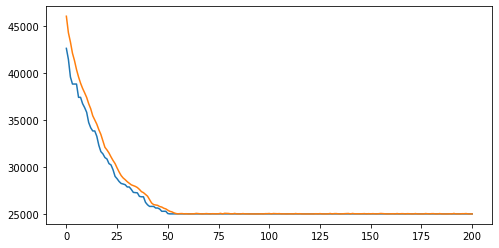

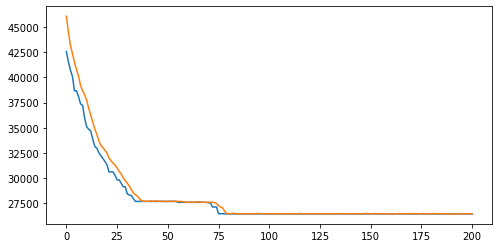

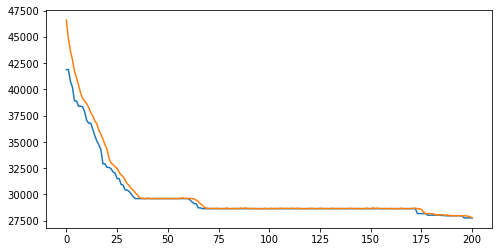

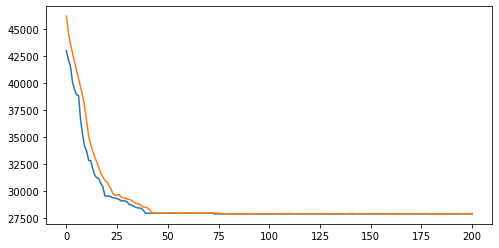

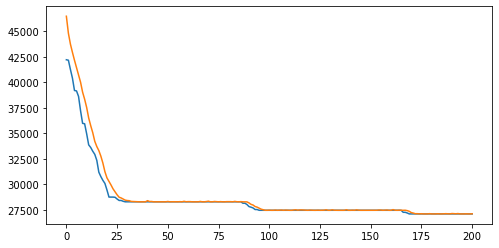

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,24993.0,24993.00,24993.0,4.551492
1,100.0,28957.0,26474.08,26449.0,4.752068
2,150.0,29386.0,27795.13,27772.0,4.748399
3,200.0,30953.0,27937.46,27907.0,4.377085
4,250.0,28507.0,27121.99,27108.0,4.411929


In [70]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

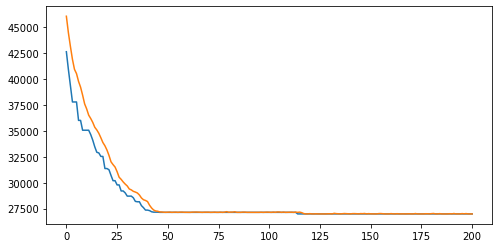

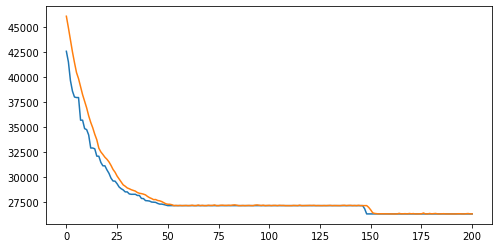

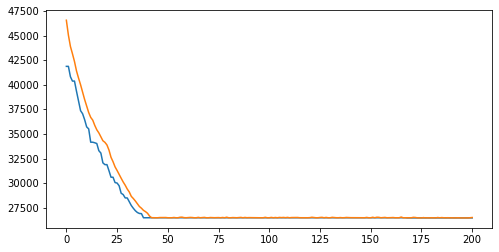

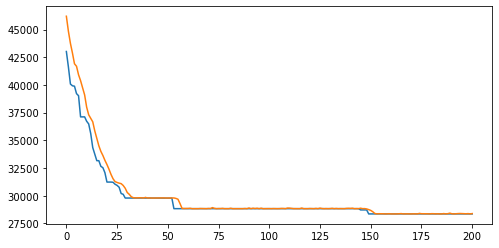

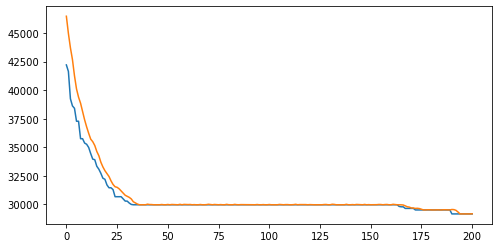

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,26984.0,26984.00,26984.0,9.777936
1,100.0,26981.0,26316.71,26310.0,10.531291
2,150.0,30462.0,26496.06,26456.0,10.303003
3,200.0,31359.0,28386.03,28356.0,10.022165
4,250.0,30307.0,29176.42,29165.0,10.073930


In [71]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.3
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

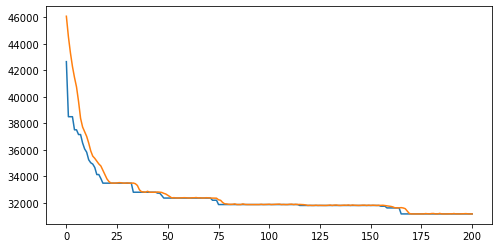

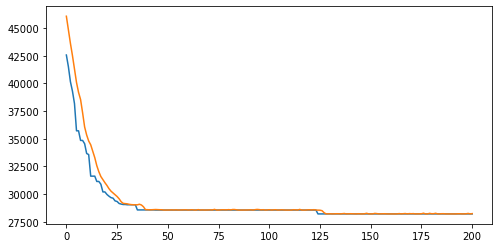

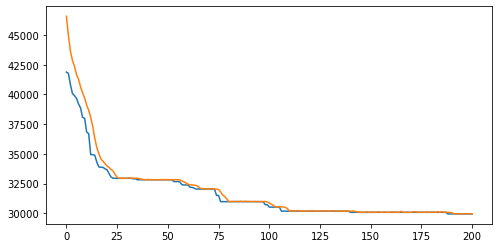

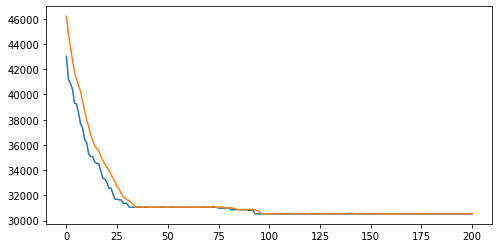

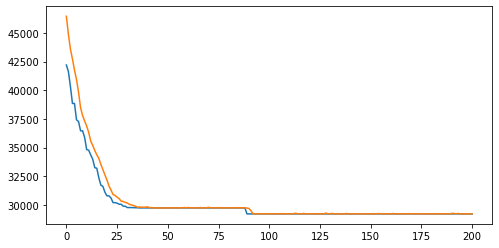

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,31157.0,31157.00,31157.0,11.737113
1,100.0,30793.0,28233.85,28208.0,13.629650
2,150.0,30747.0,29959.95,29952.0,13.730779
3,200.0,31456.0,30543.22,30534.0,12.606396
4,250.0,30821.0,29221.16,29205.0,12.850507


In [72]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

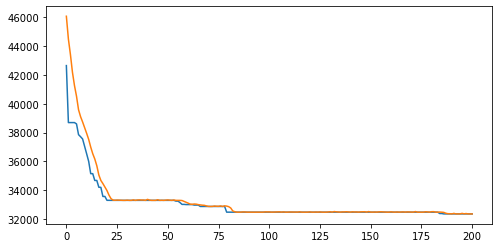

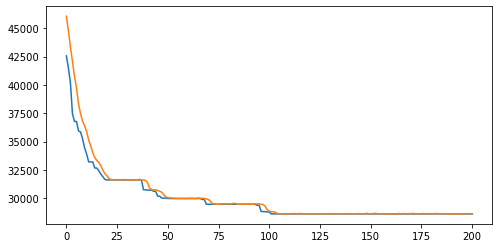

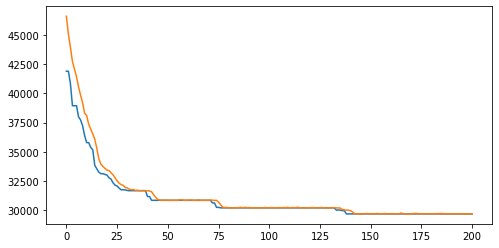

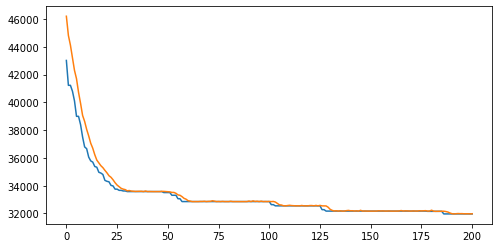

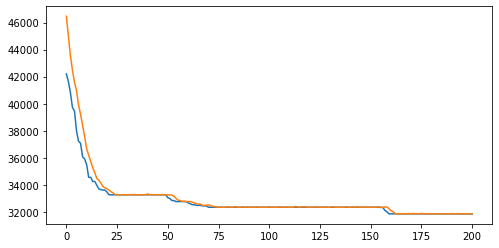

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,32354.0,32354.00,32354.0,9.221248
1,100.0,29249.0,28609.46,28603.0,9.286226
2,150.0,30761.0,29711.60,29701.0,9.820432
3,200.0,33211.0,31980.43,31968.0,9.252389
4,250.0,33282.0,31866.30,31852.0,9.663934


In [73]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.7
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

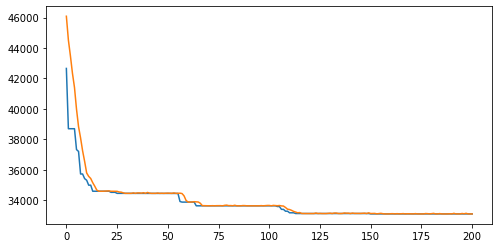

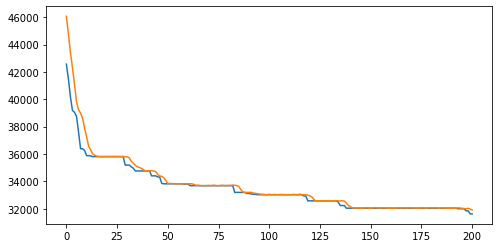

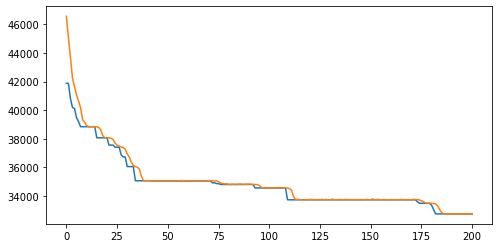

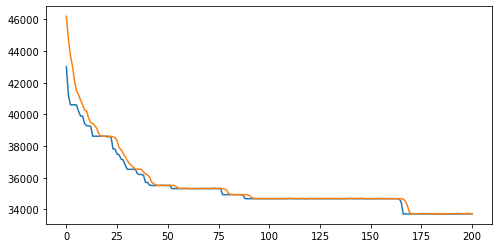

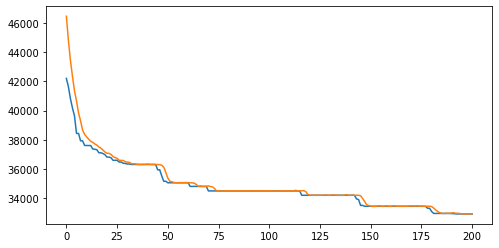

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,33104.0,33104.00,33104.0,2.793991
1,100.0,32689.0,31907.80,31619.0,2.690115
2,150.0,34791.0,32765.46,32745.0,2.717239
3,200.0,34302.0,33722.85,33717.0,2.943282
4,250.0,34374.0,32929.59,32915.0,2.666586


In [74]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

### Estudio tamaño sublista mutación

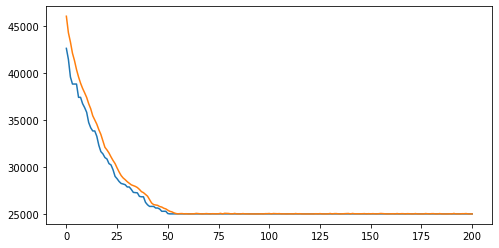

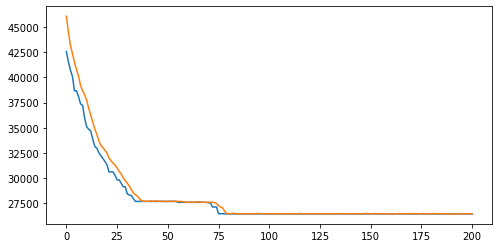

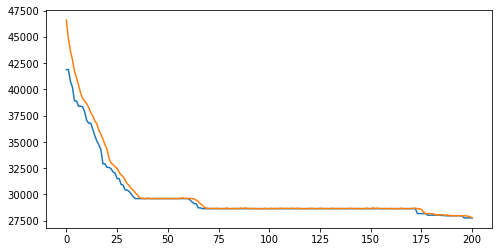

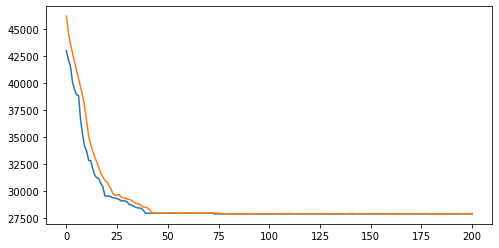

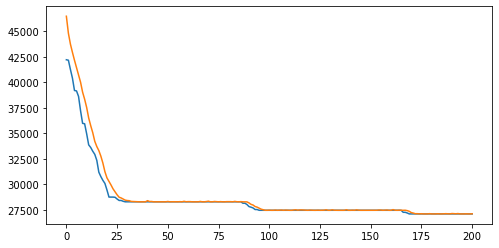

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,24993.0,24993.00,24993.0,4.795955
1,100.0,28957.0,26474.08,26449.0,4.776878
2,150.0,29386.0,27795.13,27772.0,4.511044
3,200.0,30953.0,27937.46,27907.0,4.984815
4,250.0,28507.0,27121.99,27108.0,4.544509


In [24]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

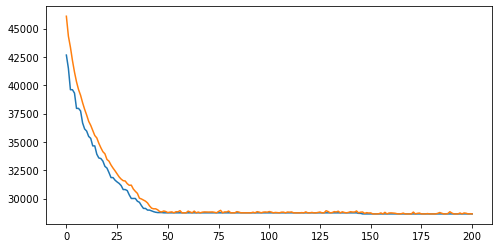

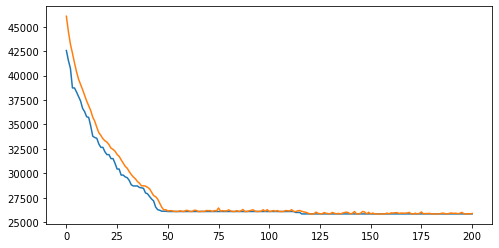

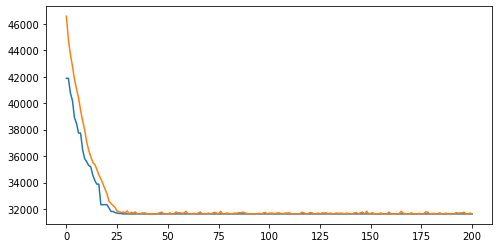

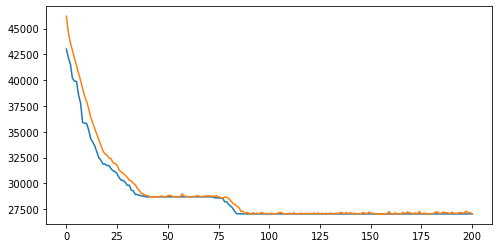

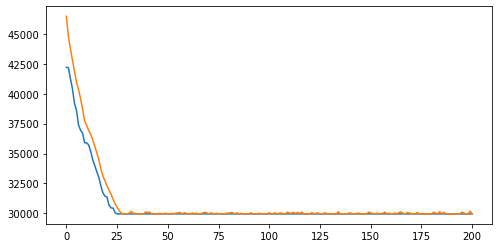

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,28641.0,28641.00,28641.0,4.892044
1,100.0,30588.0,25903.32,25856.0,4.767487
2,150.0,31626.0,31626.00,31626.0,5.359538
3,200.0,27044.0,27044.00,27044.0,4.990442
4,250.0,29959.0,29959.00,29959.0,5.217791


In [25]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.4)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

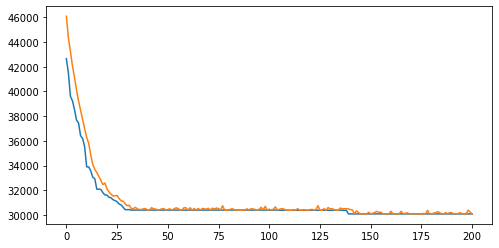

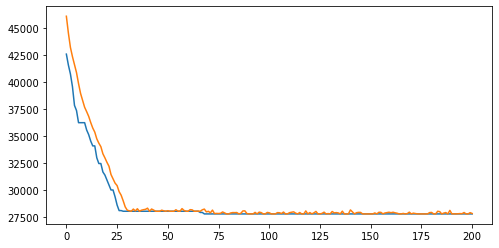

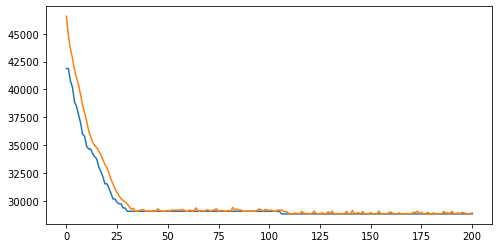

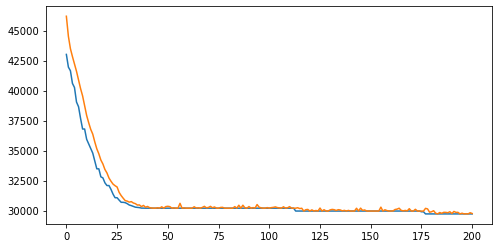

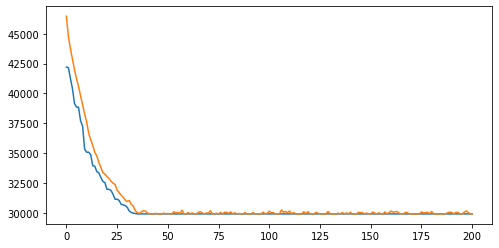

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,30083.0,30083.00,30083.0,5.306371
1,100.0,31638.0,27828.48,27790.0,5.165616
2,150.0,38099.0,28909.82,28817.0,5.126207
3,200.0,33068.0,29752.49,29719.0,5.153785
4,250.0,29902.0,29902.00,29902.0,4.745067


In [26]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.7)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

### Estudio Probabilidad de Mutación

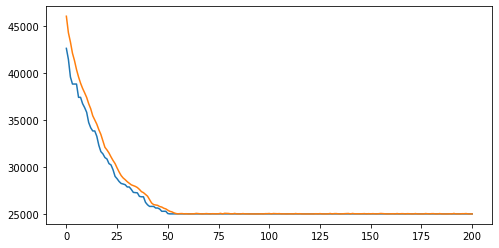

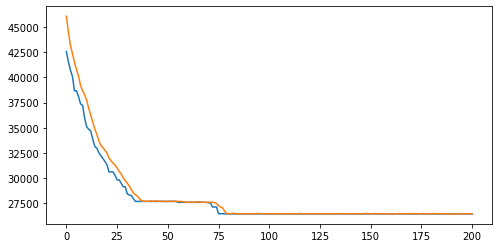

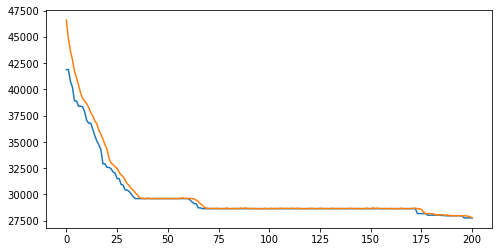

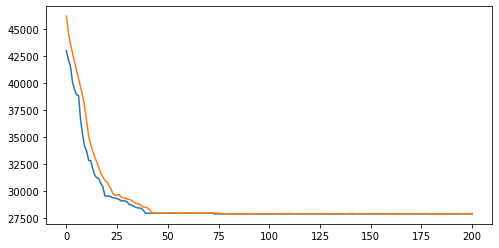

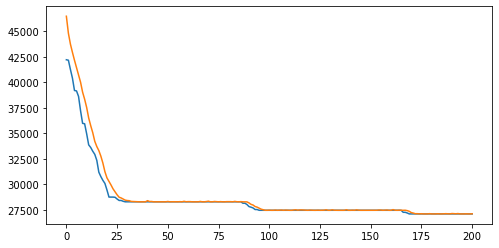

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,24993.0,24993.00,24993.0,4.947052
1,100.0,28957.0,26474.08,26449.0,4.641429
2,150.0,29386.0,27795.13,27772.0,4.901833
3,200.0,30953.0,27937.46,27907.0,4.790025
4,250.0,28507.0,27121.99,27108.0,5.063966


In [75]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.01
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

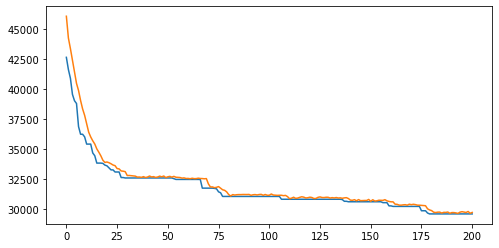

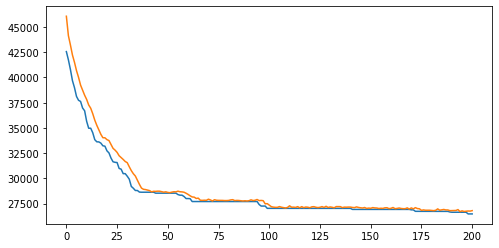

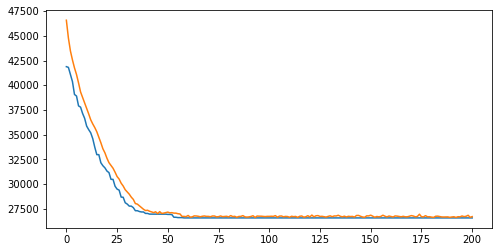

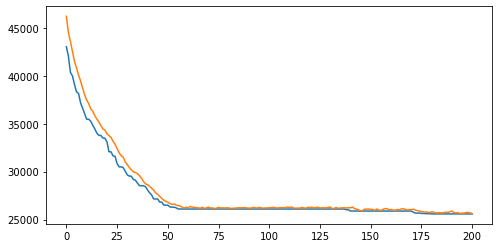

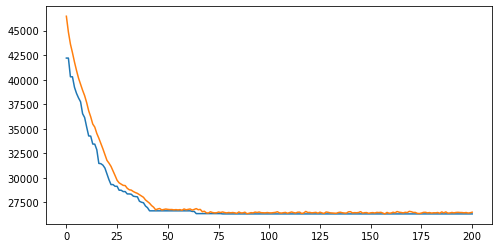

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,32093.0,29720.55,29597.0,4.670112
1,100.0,28780.0,26798.66,26474.0,4.836776
2,150.0,29487.0,26718.71,26587.0,5.098441
3,200.0,27212.0,25619.21,25591.0,4.409402
4,250.0,28932.0,26507.11,26334.0,4.823304


In [76]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.1
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

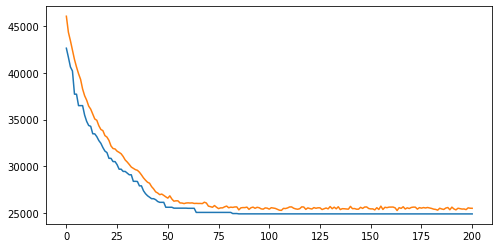

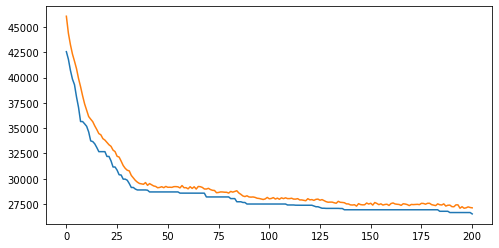

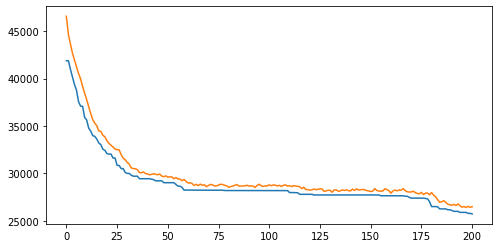

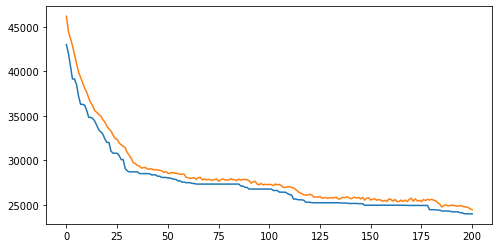

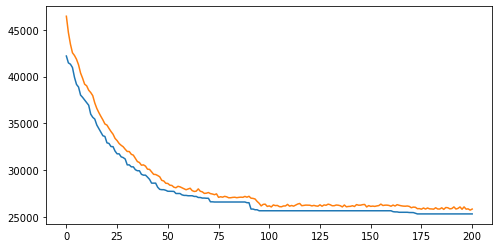

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,28984.0,25492.45,24891.0,4.432611
1,100.0,30031.0,27117.42,26516.0,4.534250
2,150.0,29642.0,26481.20,25727.0,4.632668
3,200.0,27283.0,24428.35,23967.0,4.620890
4,250.0,28718.0,25819.48,25299.0,4.485422


In [77]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.4
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

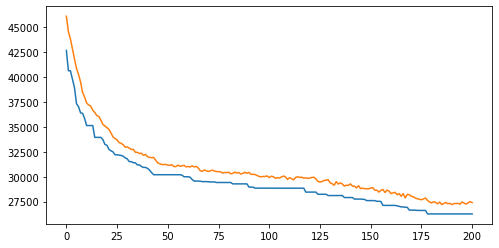

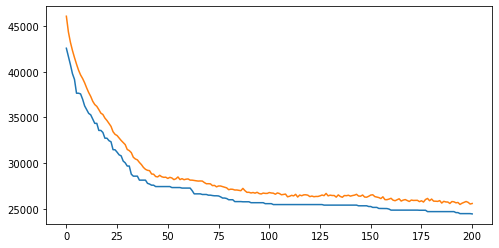

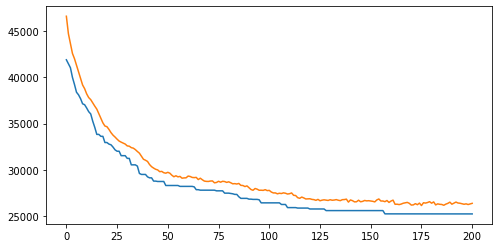

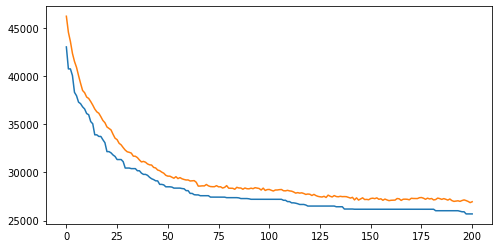

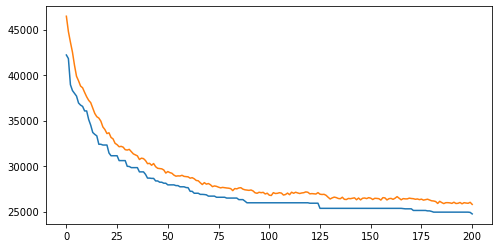

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,31255.0,27407.60,26268.0,4.616511
1,100.0,28368.0,25570.56,24430.0,4.577487
2,150.0,29140.0,26407.27,25268.0,4.593829
3,200.0,28913.0,26951.23,25686.0,4.416754
4,250.0,28283.0,25782.67,24735.0,4.592215


In [78]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.7
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

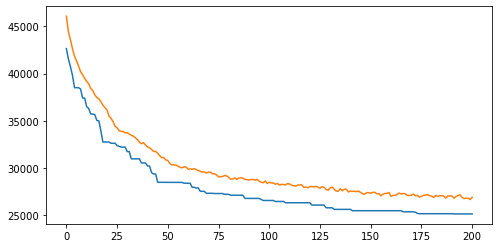

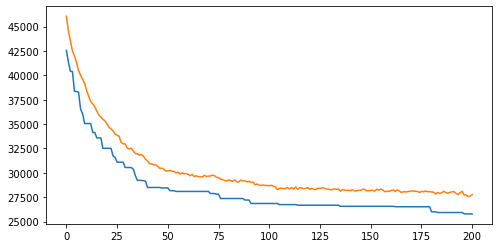

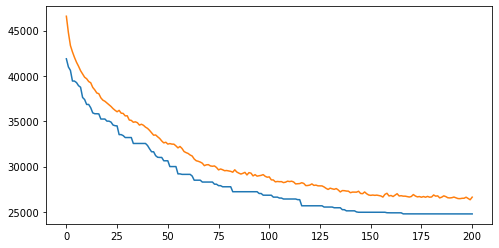

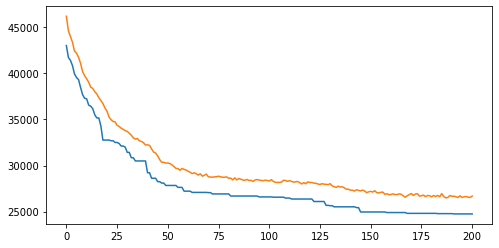

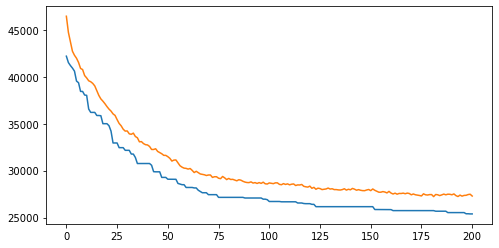

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,31281.0,26897.59,25129.0,4.814531
1,100.0,31187.0,27764.75,25786.0,4.833437
2,150.0,30191.0,26628.70,24780.0,4.774036
3,200.0,29747.0,26692.24,24754.0,4.574939
4,250.0,31648.0,27289.38,25383.0,4.578491


In [79]:
tamPobla = 100
tam = len(x)
tamTorneo = round(tamPobla * 0.05)
tSublistaCruce = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 1
gre = "n"
vueltasBucle = 10000

geneticoBasico(x, y, tamPobla, tam, tamMutacion, probabilidadMutacion, tamTorneo, tSublistaCruce, gre, vueltasBucle)

## Algoritmo Genético CHC

In [80]:
def inicializaPoblacion(tamPobla, tam, siembraGreedy):
    poblacion = []
    costePobla = []
    if siembraGreedy == "s":
        for i in range(0, tamPobla - 1):
            solucion = solucionAleatoria2(tam)
            poblacion.append(solucion)
            costePobla.append(calculaCoste(solucion))
            
        # Siembro una solución greedy
        resGreedy, coste = greedy(x, y,"n")
        poblacion.append(resGreedy)
        costePobla.append(coste)
        
    else:
        for i in range(0, tamPobla):
            solucion = solucionAleatoria2(tam)
            poblacion.append(solucion)
            costePobla.append(calculaCoste(solucion))
    
    return poblacion, costePobla

In [81]:
def selectR(poblacion, costePoblacion):
    tam = len(poblacion)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        poblacion[i], poblacion[rnd] = poblacion[rnd], poblacion[i]
        costePoblacion[i], costePoblacion[rnd] = costePoblacion[rnd], costePoblacion[i]
    return poblacion, costePoblacion

In [82]:
def recombine(poblacion, d):
    nuevaPoblacion  = []
    nuevoCostePoblacion = []
    
    iterador = 0
    numIteraciones = round(len(poblacion) / 2)
    while iterador < numIteraciones:
        
        padre1 = poblacion[iterador]
        padre2 = poblacion[iterador + 1]
        
        # Calculo la distancia de Hamming        
        distancia = distanciaHamming( padre1, padre2)
        
        if (distancia/2) > d:
            hijo1, hijo2 = cruceCHC(padre1, padre2, distancia)
            nuevaPoblacion.append(hijo1)
            nuevaPoblacion.append(hijo2)
            nuevoCostePoblacion.append(calculaCoste(hijo1))
            nuevoCostePoblacion.append(calculaCoste(hijo2))
        
        iterador = iterador + 2
    
    return nuevaPoblacion, nuevoCostePoblacion

In [83]:
def cruceCHC(padre1, padre2, distancia):
    hijo1 = []
    hijo2 = []
    
    lim = round(distancia/2)
    controlador = 0
    
    # Coloco las posiciones iguales
    tam = len(padre1)
    for i in range(0,tam):
        if padre1[i] == padre2[i]:
            hijo1.append(padre1[i])
            hijo2.append(padre1[i])
        else:
            hijo1.append(-1)
            hijo2.append(-1)
        
    # Coloco los del padre1 y/o padre2 sin estar repetidos
    for i in range(0, tam):
        if padre1[i] != padre2[i]:
            if controlador < lim:
                controlador = controlador + 1
                if padre1[i] not in hijo1:
                    hijo1[i] = padre1[i]
                if padre2[i] not in hijo2:
                    hijo2[i] = padre2[i]
                    
            else:
                if padre2[i] not in hijo1:
                    hijo1[i] = padre2[i]
                if padre1[i] not in hijo2:
                    hijo2[i] = padre1[i]
    
    # Relleno los valores -1
    npHijo1 = np.array(hijo1)
    npHijo2 = np.array(hijo2)
    
    posHijo1 = np.where(npHijo1 == -1)
    posHijo2 = np.where(npHijo2 == -1)
    
    nodos = list(range(0,len(padre1)))
    
    for pos in posHijo1[0]:
        for i in padre2:
            if i not in hijo1:
                hijo1[int(pos)] = i
                break
    
    for pos in posHijo2[0]:
        for i in padre1:
            if i not in hijo2:
                hijo2[int(pos)] = i
                break
                
    return hijo1, hijo2

In [84]:
def distanciaHamming( padre1, padre2):
    tam = len(padre1)
    distancia = 0
    for i in range(0, tam):
        if padre1[i] != padre2[i]:
            distancia = distancia + 1
    return distancia

In [85]:
def selectS(poblacion, costePoblacion, nuevaPoblacion, nuevoCostePoblacion, tamPobla):
    
    resultPoblacion = []
    resultCoste = []
    
    poblacionTotal = poblacion + nuevaPoblacion
    costeTotal = costePoblacion + nuevoCostePoblacion
    
    aux = costeTotal.copy()
    aux.sort()
    aux = np.array(aux)
    
    numHijos = 0
    
    it = 0        
    while it < tamPobla:
        minimo = np.where(costeTotal == aux[it])
        maxlen = len(minimo[0])
        z = 0
        while z < maxlen and it < tamPobla:
            candidato = poblacionTotal[int(minimo[0][z])]
            resultPoblacion.append(poblacionTotal[int(minimo[0][z])])
            if candidato in nuevaPoblacion:
                numHijos += 1
            resultCoste.append(aux[it])
            it += 1
            z += 1
    
    return resultPoblacion, resultCoste, numHijos

In [86]:
def diverge(mejor, costeMejor, tamPobla):
    poblacion = []
    poblacion.append(mejor)
    costePoblacion = []
    costePoblacion.append(costeMejor)
        
    numCambiosMin = round(len(mejor) * 0.35)
        
    random.seed(costeMejor)
        
    for i in range(1, tamPobla):
        aux = mejor.copy()
        for c in range(0,numCambiosMin):
            rnd1 = random.randint(0, len(mejor) - 1)
            rnd2 = random.randint(0, len(mejor) - 1)
            aux[rnd1], aux[rnd2] = aux[rnd2], aux[rnd1]
        
        poblacion.append(aux)
        costePoblacion.append(calculaCoste(aux))        
           
    return poblacion, costePoblacion    

In [87]:
def geneticoCHC(x, y, greed, tamPobla, tam, numReinicializaciones):
    analisisResultado = []
    for sem in range(0,5):
        resultadoIntermedio = []
        tic()
        semilla = ( sem + 1 ) * 50
        random.seed(semilla)
        cMedia = []
        cMejor = []
    
        # Inicializo límite de cruce
        d = round(tam/4)

        # Inicializo poblacion
        poblacion, costePoblacion = inicializaPoblacion(tamPobla, tam,  greed)

        cMedia.append(statistics.mean(costePoblacion))
        cMejor.append(min(costePoblacion))
        
        iterador = 0
        while iterador <= numReinicializaciones:

            # Selectr
            poblacion, costePoblacion = selectR(poblacion, costePoblacion)
            
            # Recombine y evaluate
            nuevaPoblacion, nuevoCostePoblacion = recombine(poblacion, d)

            ## Selección elite, me quedo con los tamPobl mejores
            poblacion, costePoblacion, numHijos = selectS(poblacion, costePoblacion, nuevaPoblacion, nuevoCostePoblacion, tamPobla)

            ## Reduzco d, si ninguno se ha cruzado
            if numHijos == 0:
                d = d - 1

            if d < 0:
                costeMejor = min(costePoblacion)
                pos = np.where(np.array(costePoblacion) == costeMejor )
                mejor = poblacion[int(pos[0][0])]
                poblacion, costePoblacion = diverge(mejor, costeMejor, tamPobla)
                iterador = iterador + 1
                d = round(tam/4)

            if iterador < numReinicializaciones:
                cMedia.append(statistics.mean(costePoblacion))
                cMejor.append(min(costePoblacion))
        
        t = toc()
        resultadoIntermedio.append(semilla)
        resultadoIntermedio.append(max(costePoblacion))
        resultadoIntermedio.append(statistics.mean(costePoblacion))
        resultadoIntermedio.append(min(costePoblacion))
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)   
        
        plt.figure(figsize=(8, 4))
        plt.plot(cMejor)
        plt.plot(cMedia)
        plt.show()
        
    representaResultados2(analisisResultado, "AG-CHC")

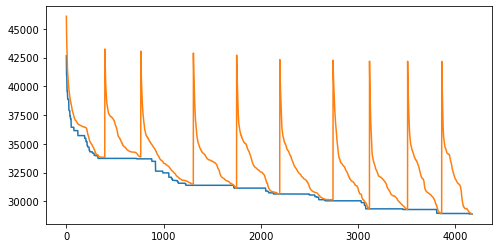

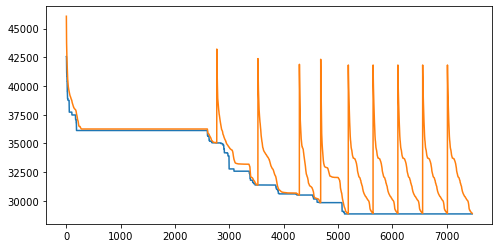

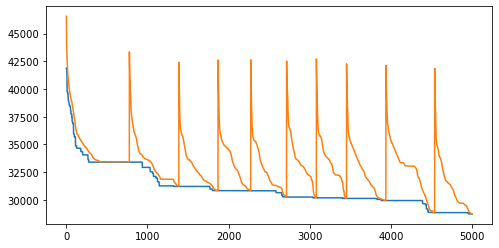

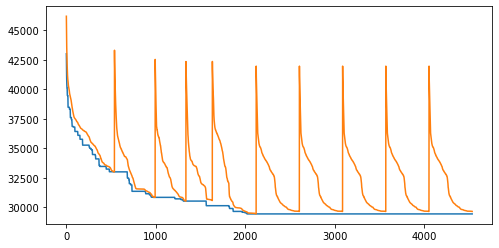

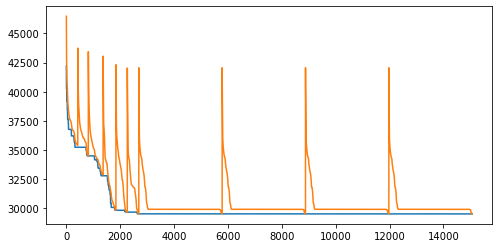

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,46492.0,42179.92,28915.0,45.847073
1,100.0,45714.0,41825.61,28872.0,77.953043
2,150.0,47453.0,42360.39,28711.0,55.850984
3,200.0,47841.0,41967.88,29426.0,43.735654
4,250.0,47855.0,42048.71,29533.0,241.237883


In [88]:
tamPobla = 100
tam = len(x)
numReinicializaciones = 10
greed = "n"
random.seed(tamPobla * numReinicializaciones)

geneticoCHC(x, y, greed, tamPobla, tam, numReinicializaciones)

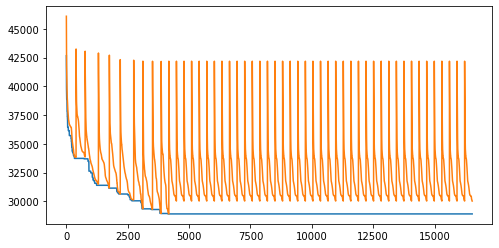

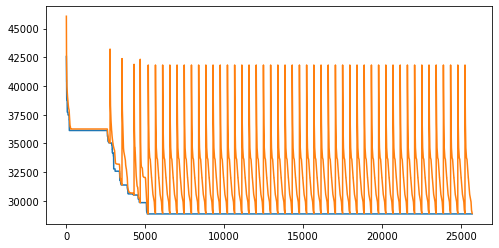

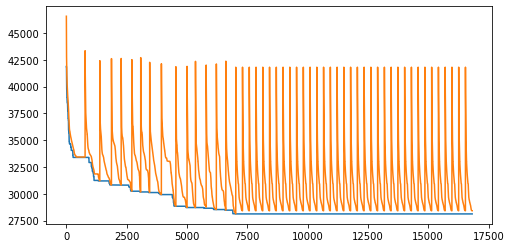

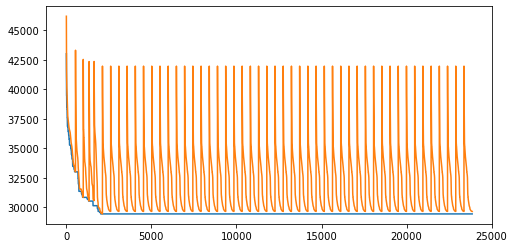

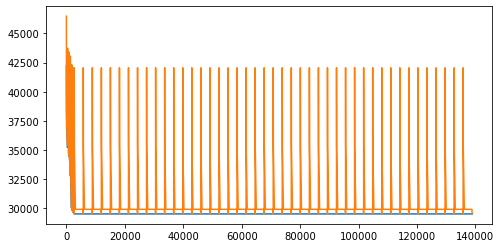

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,46492.0,42179.92,28915.0,167.983039
1,100.0,45714.0,41825.61,28872.0,234.598509
2,150.0,48573.0,41815.96,28117.0,155.599149
3,200.0,47841.0,41967.88,29426.0,200.096514
4,250.0,47855.0,42048.71,29533.0,1975.898933


In [89]:
tamPobla = 100
tam = len(x)
numReinicializaciones = 50
greed = "n"
random.seed(tamPobla * numReinicializaciones)

geneticoCHC(x, y, greed, tamPobla, tam, numReinicializaciones)

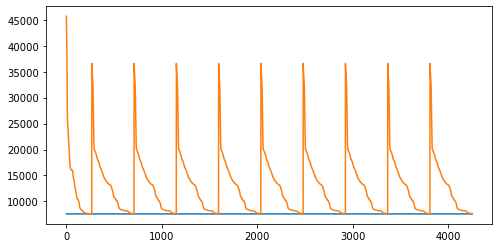

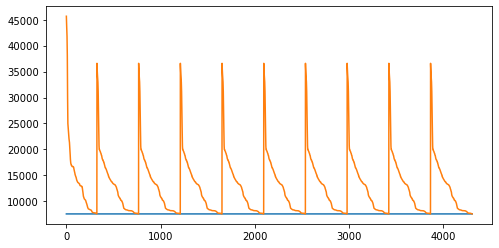

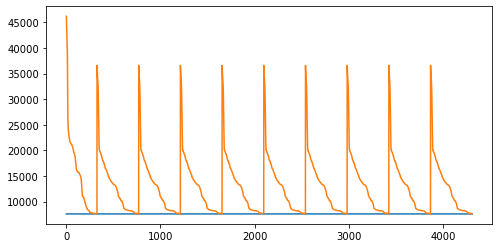

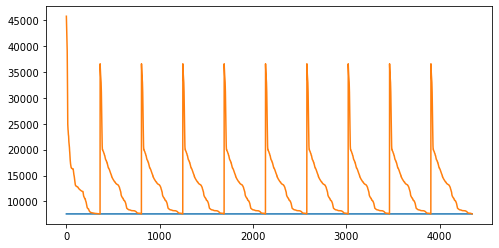

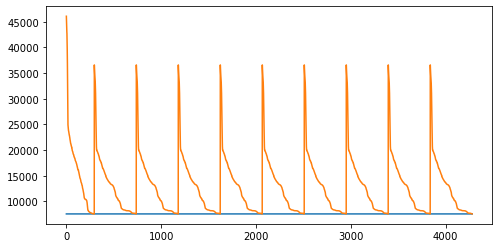

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,41265.0,36590.05,7579.0,68.554971
1,100.0,41265.0,36590.05,7579.0,61.806108
2,150.0,41265.0,36590.05,7579.0,65.936593
3,200.0,41265.0,36590.05,7579.0,63.458146
4,250.0,41265.0,36590.05,7579.0,67.613809


In [90]:
tamPobla = 100
tam = len(x)
numReinicializaciones = 10
greed = "s"
random.seed(tamPobla * numReinicializaciones)

geneticoCHC(x, y, greed, tamPobla, tam, numReinicializaciones)

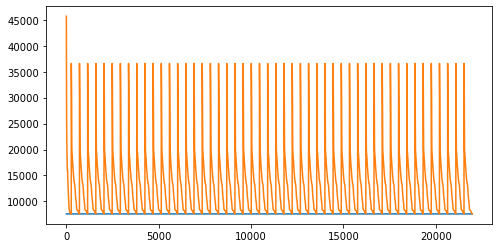

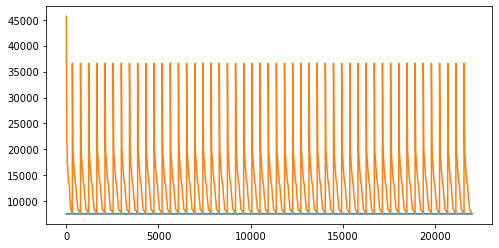

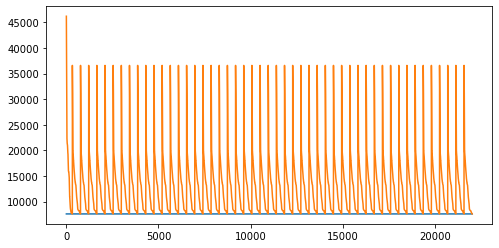

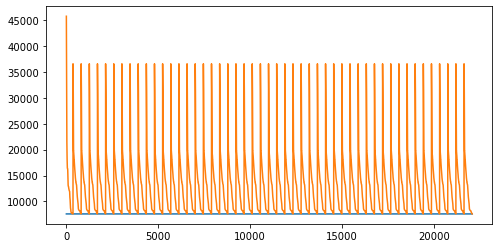

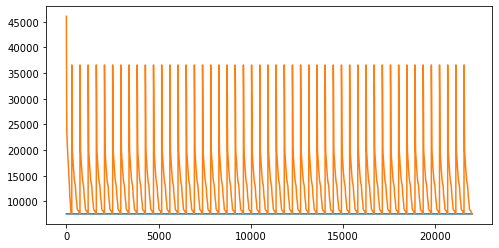

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,41265.0,36590.05,7579.0,307.297098
1,100.0,41265.0,36590.05,7579.0,266.141974
2,150.0,41265.0,36590.05,7579.0,287.930251
3,200.0,41265.0,36590.05,7579.0,272.381408
4,250.0,41265.0,36590.05,7579.0,315.449547


In [91]:
tamPobla = 100
tam = len(x)
numReinicializaciones = 50
greed = "s"
random.seed(tamPobla * numReinicializaciones)

geneticoCHC(x, y, greed, tamPobla, tam, numReinicializaciones)

## Algoritmo Genético Multimodal

In [19]:
def seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla):
    minimo = max(costePobla)
    pad = 0
    for selecc in range(0, tamTorneo):
        cand = random.randint(0,tamPobla - 1)
        coste = costePobla[cand]
        if (coste < float("inf")) and (coste < minimo ):
            minimo = coste
            pad = cand
    return poblacion[pad]

In [20]:
def mutaSolucion(wBest, s):
    n = len(wBest)

    pivote1 = random.randint(0,n - 1)
    pivote2 = pivote1 + s

    if pivote2 > (n - 1):
        pivote2 = n - 1

    sublista = wBest[pivote1:pivote2 + 1]

    tam = len(sublista)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        sublista[i], sublista[rnd] = sublista[rnd], sublista[i]

    wBest[pivote1:pivote2 + 1] = sublista
    return wBest

In [21]:
def cruce(padre1, padre2, porTSublista):
    
    n = len(padre1)
    
    tSublista = round(n * porTSublista)
    
    pivote1 = random.randint(0,n - 2)
    pivote2 = pivote1 + tSublista + 1
        
    if pivote2 > n:
        pivote2 = n
    
    sublista = padre1[pivote1:pivote2]
    
    descendiente = list(range(0,n))
    descendiente[pivote1:pivote2] = sublista
    
    for i in range(0,n):
        if i < pivote1 or i >= pivote2:
            for k in range(0,len(padre2)):
                ciu = padre2[k]
                if ciu not in sublista:
                    descendiente[i] = ciu
                    padre2.remove(ciu)
                    break

    return descendiente

In [22]:
def generaPoblacion(x, y, greed, tam, tamPobla):
    poblacion = []
    costePobla = []
    
    if greed == "s":
        for i in range(0, tamPobla - 1):
            solucion = solucionAleatoria2(tam)
            poblacion.append(solucion)
            costePobla.append(calculaCoste(solucion))

     # Siembro una solución greedy
        resGreedy, coste = greedy(x, y,"n")
        poblacion.append(resGreedy)
        costePobla.append(coste)

    else:
        for i in range(0, tamPobla):
            solucion = solucionAleatoria2(tam)
            poblacion.append(solucion)
            costePobla.append(calculaCoste(solucion))
    
    return poblacion, costePobla

In [23]:
def distanciaHamming( padre1, padre2):
    tam = len(padre1)
    distancia = 0
    for i in range(0, tam):
        if padre1[i] != padre2[i]:
            distancia = distancia + 1
    return distancia

In [24]:
def ordenaPoblacion(poblacion, costePobla):
    costePoblaOrdenada, poblacionOrdenada = map(list, zip(*sorted(zip(costePobla, poblacion))))
    return poblacionOrdenada, costePoblaOrdenada

In [25]:
def aclaraPoblacion(poblacion, costePobla, radioNicho, Kappa):
    for i in range(0, len(poblacion)):
        if costePobla[i] != float("inf"):
            numGanadores = 1
            for j in range(i + 1, len(poblacion)):
                if (costePobla[j] != float("inf")) and (distanciaHamming( poblacion[i], poblacion[j]) < radioNicho): 
                    if numGanadores < Kappa:
                        numGanadores += 1
                    else:
                        costePobla[j] = float("inf")
    
    return poblacion, costePobla    

In [26]:
def geneticoMultimodal(x, y, greed, iteracionesSinMejora, tam, tamPobla, tamTorneo, porTSublista, tamMutacion, probabilidadMutacion, numIteraciones, radioNicho, Kappa):
    analisisResultado = []
    for sem in range(0,5):
        resultadoIntermedio = []
        tic()
        semilla = ( sem + 1 ) * 50
        random.seed(semilla)
        cMedia = []
        cMejor = []
    
        limBuclue = ((tamPobla/2) - 0.1 * tamPobla)

        # Creación de población inicial
        poblacion = []
        costePobla = []
        poblacion, costePobla = generaPoblacion(x, y, greed, tam, tamPobla);

        cMedia.append(statistics.mean(costePobla))
        cMejor.append(min(costePobla))
        
        iterador = 0
        while iterador < iteracionesSinMejora:

            poblacion, costePobla = ordenaPoblacion(poblacion, costePobla)
            poblacion, costePobla = aclaraPoblacion(poblacion, costePobla, radioNicho, Kappa)

            nuevaPoblacion = []
            nuevoCostePoblacion = []

            mejorPadre = min(costePobla)

            it = 0    
            while it < limBuclue:

                padre1 = seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla)
                padre2 = seleccionTorneo(poblacion, costePobla, tamTorneo, tamPobla)

                descendiente1 = cruce(padre1.copy(), padre2.copy(), porTSublista)
                descendiente2 = cruce(padre2.copy(), padre1.copy(), porTSublista)

                # Probabilidad de mutacion
                dado1 = random.random()
                dado2 = random.random()

                if dado1 <= probabilidadMutacion:
                    descendiente1 = mutaSolucion(descendiente1, tamMutacion)

                if dado2 <= probabilidadMutacion:
                    descendiente2 = mutaSolucion(descendiente2, tamMutacion)

                costeDescendiente1 = calculaCoste(descendiente1)
                costeDescendiente2 = calculaCoste(descendiente2) 

                nuevaPoblacion.append(descendiente1)
                nuevaPoblacion.append(descendiente2)

                nuevoCostePoblacion.append(costeDescendiente1)
                nuevoCostePoblacion.append(costeDescendiente2)

                it += 1

            i = 0
            while len(nuevaPoblacion) < tamPobla:
                nuevaPoblacion.append(poblacion[i])
                nuevoCostePoblacion.append(costePobla[i])
                i += 1   

            poblacion,costePobla = ordenaPoblacion(nuevaPoblacion, nuevoCostePoblacion)

            cMedia.append(statistics.mean(costePobla))
            cMejor.append(min(costePobla))
            
            mejorHijo = min(costePobla)

            if (mejorHijo < mejorPadre):
                iterador = 0
            else:
                iterador +=1
        t = toc()
        resultadoIntermedio.append(semilla)
        resultadoIntermedio.append(max(costePobla))
        resultadoIntermedio.append(statistics.mean(costePobla))
        resultadoIntermedio.append(min(costePobla))
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)   
        
        #plt.figure(figsize=(8, 4))
        #plt.plot(cMejor)
        #plt.plot(cMedia)
        #plt.show()
        
    representaResultados2(analisisResultado, "AG-Multimodal")

In [32]:
greed = "s"
tam = len(x)
tamPobla = 100
iteracionesSinMejora = 1000 * 2 / tamPobla
tamTorneo = round(tamPobla * 0.05)
porTSublista = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.1
numIteraciones = 5

radioNicho = round(0.1 * len(x))
Kappa = 5

geneticoMultimodal(x, y, greed, iteracionesSinMejora, tam, tamPobla, tamTorneo, porTSublista, tamMutacion, probabilidadMutacion, numIteraciones, radioNicho, Kappa)

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,inf,inf,7579.0,1.465907
1,100.0,inf,inf,7578.0,2.209884
2,150.0,inf,inf,7579.0,1.881936
3,200.0,inf,inf,7579.0,1.755759
4,250.0,inf,inf,7579.0,1.638060


In [27]:
greed = "s"
tam = len(x)
tamPobla = 100
iteracionesSinMejora = 1000 * 2 / tamPobla
tamTorneo = round(tamPobla * 0.05)
porTSublista = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.1
numIteraciones = 5

radioNicho = round(0.1 * len(x))
Kappa = 5

geneticoMultimodal(x, y, greed, iteracionesSinMejora, tam, tamPobla, tamTorneo, porTSublista, tamMutacion, probabilidadMutacion, numIteraciones, radioNicho, Kappa)

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,inf,inf,7579.0,2.906210
1,100.0,inf,inf,7579.0,3.567544
2,150.0,inf,inf,7579.0,3.818949
3,200.0,inf,inf,7579.0,4.243513
4,250.0,inf,inf,7579.0,4.002158


In [33]:
greed = "n"
tam = len(x)
tamPobla = 100
iteracionesSinMejora = 1000 * 2 / tamPobla
tamTorneo = round(tamPobla * 0.05)
porTSublista = 0.1
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.1
numIteraciones = 5

radioNicho = round(0.1 * len(x))
Kappa = 5

geneticoMultimodal(x, y, greed, iteracionesSinMejora, tam, tamPobla, tamTorneo, porTSublista, tamMutacion, probabilidadMutacion, numIteraciones, radioNicho, Kappa)

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,inf,inf,24893.0,10.617979
1,100.0,inf,inf,23131.0,11.272376
2,150.0,inf,inf,24559.0,8.136590
3,200.0,inf,inf,21532.0,14.641781
4,250.0,inf,inf,24774.0,9.498997


In [28]:
greed = "n"
tam = len(x)
tamPobla = 100
iteracionesSinMejora = 1000 * 2 / tamPobla
tamTorneo = round(tamPobla * 0.05)
porTSublista = 0.5
tamMutacion = round(len(x) * 0.1)
probabilidadMutacion = 0.1
numIteraciones = 5

radioNicho = round(0.1 * len(x))
Kappa = 5

geneticoMultimodal(x, y, greed, iteracionesSinMejora, tam, tamPobla, tamTorneo, porTSublista, tamMutacion, probabilidadMutacion, numIteraciones, radioNicho, Kappa)

,Semilla,Coste Maximo,Coste Medio,Coste Mínimo,Tiempo
0,50.0,inf,inf,30691.0,6.807433
1,100.0,inf,inf,27274.0,13.186418
2,150.0,inf,inf,24654.0,23.964194
3,200.0,inf,inf,23316.0,19.909841
4,250.0,inf,inf,26191.0,20.110055
